In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train_data.csv', sep=',')
df_test = pd.read_csv('test_data.csv', sep=',')

C:\Users\joaom\AppData\Local\Temp\ipykernel_22764\3957952904.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_data.csv', sep=',')


In [3]:
print(df.iloc[:,29].isna().sum())
# Check the data types for each value in column 29
print(df.iloc[:, 29].apply(type).value_counts())

48082
Zip Code
<class 'str'>      530364
<class 'float'>     63107
Name: count, dtype: int64


In [4]:
# Changing the data type of the values to string
df.iloc[:, 29] = df.iloc[:, 29].astype(str)
print(df.iloc[:, 29].apply(type).value_counts())

Zip Code
<class 'str'>    593471
Name: count, dtype: int64


In [58]:
#pd.set_option('display.max_columns', None) 
#df.set_index('Claim Identifier', inplace=True)
df.head(25)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   
5393889             2019-12-06           40.0                              N   
957648180                  NaN            NaN                            NaN   
5393887             2019-12-30           61.0                              N   
5393863             2019-12-26           67.0                              N   
5393848             2019-12-28           48.0                              N   
5394182             2019-12-30           33.0                              N   
5393881             2019-12-23           55.0                              N   
5394084             2019-12-29           20.0                              N   
5394003             2019-12-28           48.0                              N   
5394187             2019-12-14           21.0                              N   
5393985             2019-12-26           51.0                              N   
5393907             2019-08-26           62.0                              N   
5393838             2019-12-19           35.0                              N   
5393826             2019-12-18           54.0                              N   
5394012             2019-12-28           32.0                              N   
5393811             2019-12-19           34.0                              N   
5394026             2019-12-18           55.0                              N   
5394109             2019-12-29           55.0                              N   
5393888             2019-12-28           38.0                              N   
5393931             2019-09-15           30.0                              N   
5394189             2019-12-06           55.0                              N   
5394080             2019-12-24           36.0                              N   
5394160             2019-12-19           61.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   
5393889             2020-01-01                       N              1434.80   
957648180           2020-01-01                     NaN                  NaN   
5393887             2020-01-01                       N                  NaN   
5393863             2020-01-01                       N                 0.00   
5393848             2020-01-01                       N                 0.00   
5394182             2020-01-01                       N                 0.00   
5393881             2020-01-01                       N                 0.00   
5394084             2020-01-01                       N               225.00   
5394003             2020-01-01                       N                 0.00   
5394187             2020-01-01                       N                 0.00   
5393985             2020-01-01                       N                 0.00   
5393907             2020-01-01                       N                 0.00   
5393838             2020-01-01                       N               512.95   
5393826             2020-01-01                       Y              1718.78   
5394012             2020-01-01                       N                 0.00   
5393811             2020-01-01                       Y              1682.39   
5394026             2020-01-01                       Y               665.45   
5394109             2020-01-01                       N                 0.00   
5393888             2020-01-01                       Y               999.86   
5393931             2020-01-01         

In [50]:
df['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [6]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [61]:
df['Age at Injury'].value_counts

Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     13657
51.0     13486
         ...  
115.0        1
5.0          1
104.0        1
113.0        1
114.0        1
Name: count, Length: 108, dtype: int64

In [75]:
# Calculate the number of NaNs for each column
nan_counts = df.isna().sum()

# Get the total number of rows (entries) in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of NaN values for each column
percentage_nans = (nan_counts / total_rows) * 100

# Format the percentage with '%' sign
percentage_nans = percentage_nans.apply(lambda x: f"{x:.2f}%")

# Combine all information into a DataFrame for better readability
nan_summary = pd.DataFrame({
    'NaN Count': nan_counts,
    'Total Values': [total_rows] * len(nan_counts),  # Ensure this column matches the length of nan_counts
    'Percentage NaN': percentage_nans
})

# Print the result
print("Summary of NaN values per column:")
print(nan_summary)

Summary of NaN values per column:
                                    NaN Count  Total Values Percentage NaN
Accident Date                           23134        593471          3.90%
Age at Injury                           19445        593471          3.28%
Alternative Dispute Resolution          19445        593471          3.28%
Assembly Date                               0        593471          0.00%
Attorney/Representative                 19445        593471          3.28%
Average Weekly Wage                     48096        593471          8.10%
Birth Year                              48523        593471          8.18%
C-2 Date                                34005        593471          5.73%
C-3 Date                               406226        593471         68.45%
Carrier Name                            19445        593471          3.28%
Carrier Type                            19445        593471          3.28%
Claim Injury Type                       19445        593471       

In [8]:
print(df.duplicated().sum())

18350


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [10]:
df.describe(include ='all').T

count unique  \
Accident Date                         570337   5539   
Age at Injury                       574026.0    NaN   
Alternative Dispute Resolution        574026      3   
Assembly Date                         593471   1096   
Attorney/Representative               574026      2   
Average Weekly Wage                 545375.0    NaN   
Birth Year                          544948.0    NaN   
C-2 Date                              559466   2475   
C-3 Date                              187245   1648   
Carrier Name                          574026   2046   
Carrier Type                          574026      8   
Claim Injury Type                     574026      8   
County of Injury                      574026     63   
COVID-19 Indicator                    574026      2   
District Name                         574026      8   
First Hearing Date                    150798   1094   
Gender                                574026      4   
IME-4 Count                         132803.0    NaN   
Industry Code                       564068.0    NaN   
Industry Code Description             564068     20   
Medical Fee Region                    574026      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           558386.0    NaN   
WCIO Cause of Injury Description      558386     74   
WCIO Nature of Injury Code          558369.0    NaN   
WCIO Nature of Injury Description     558369     56   
WCIO Part Of Body Code              556944.0    NaN   
WCIO Part Of Body Description         556944     54   
Zip Code                              593471  10061   
Agreement Reached                   574026.0    NaN   
WCB Decision                          574026      1   
Number of Dependents                574026.0    NaN   

                                                                  top    freq  \
Accident Date                                              2020-03-01    1245   
Age at Injury                                                     NaN     NaN   
Alternative Dispute Resolution                                      N  571412   
Assembly Date                                              2020-03-06    1422   
Attorney/Representative                                             N  392291   
Average Weekly Wage                                               NaN     NaN   
Birth Year                                                        NaN     NaN   
C-2 Date                                                   2021-05-11    1847   
C-3 Date                                                   2021-04-21     350   
Carrier Name                                     STATE INSURANCE FUND  111144   
Carrier Type                                              1A. PRIVATE  285368   
Claim Injury Type                                         2. NON-COMP  291078   
County of Injury                                              SUFFOLK   60430   
COVID-19 Indicator                                                  N  546505   
District Name                                                     NYC  270779   
First Hearing Date                                         2022-04-15     440   
Gender                                                              M  335218   
IME-4 Count                                                       NaN     NaN   
Industry Code                                                     NaN     NaN   
Industry Code Description           HEALTH CARE AND SOCIAL ASSISTANCE  114339   
Medical Fee Region                                                 IV  265981   
OIICS Nature of Injury Description                                NaN     NaN   
WCIO Cause of Injury Code                                         NaN     NaN   
WCIO Cause of Injury Description                              LIFTING   46610   
WCIO Nature of Injury Code                                        NaN     NaN   
WCIO Nature of Injury Description                      STRAIN OR TEAR  153373   
WCIO Part Of Body Code              

In [11]:
(df['Age at Injury'].isna()).sum()

19445

In [12]:
(df['Alternative Dispute Resolution']).value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [13]:
(df['Attorney/Representative']).value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [14]:
(df['Average Weekly Wage']).value_counts()

Average Weekly Wage
0.00       335450
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120024, dtype: int64

In [68]:
df_nulos = df[df['Age at Injury'].isnull()]
print(df_nulos)

                 Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
957648180                  NaN            NaN                            NaN   
363651794                  NaN            NaN                            NaN   
209507552                  NaN            NaN                            NaN   
970865999                  NaN            NaN                            NaN   
807753247                  NaN            NaN                            NaN   
...                        ...            ...                            ...   
365870975                  NaN            NaN                            NaN   
327160035                  NaN            NaN                            NaN   
249875936                  NaN            NaN                            NaN   
120584215                  NaN            NaN                            NaN   
818961390                  NaN          

# Single Variables

C:\Users\joaom\AppData\Local\Temp\ipykernel_22764\1852293790.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age at Injury'].dropna(), shade=True)


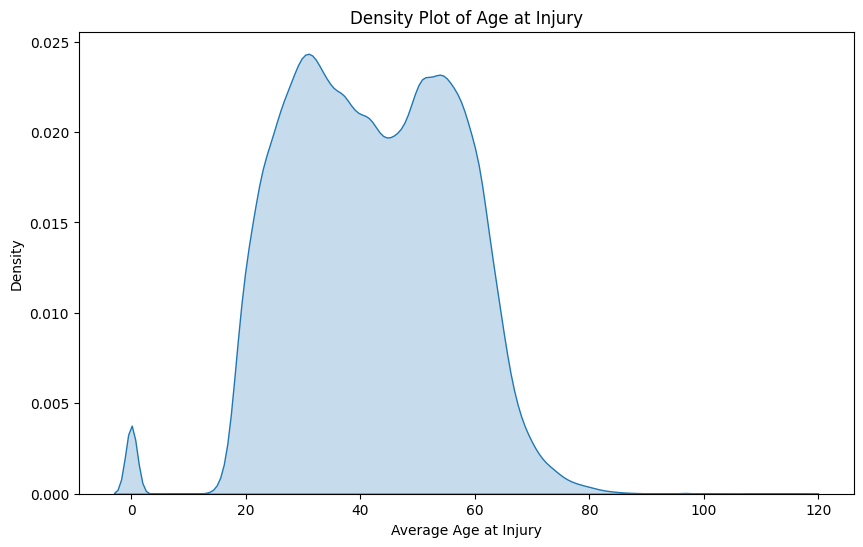

In [69]:
# Create a density plot of 'Average Weekly Wage'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age at Injury'].dropna(), shade=True)
plt.title('Density Plot of Age at Injury')
plt.xlabel('Average Age at Injury')
plt.ylabel('Density')
plt.show()

In [15]:
average_Wage_no_zeros= df['Average Weekly Wage']!=0.0

C:\Users\joaom\AppData\Local\Temp\ipykernel_24808\839501103.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Average Weekly Wage'].dropna(), shade=True)


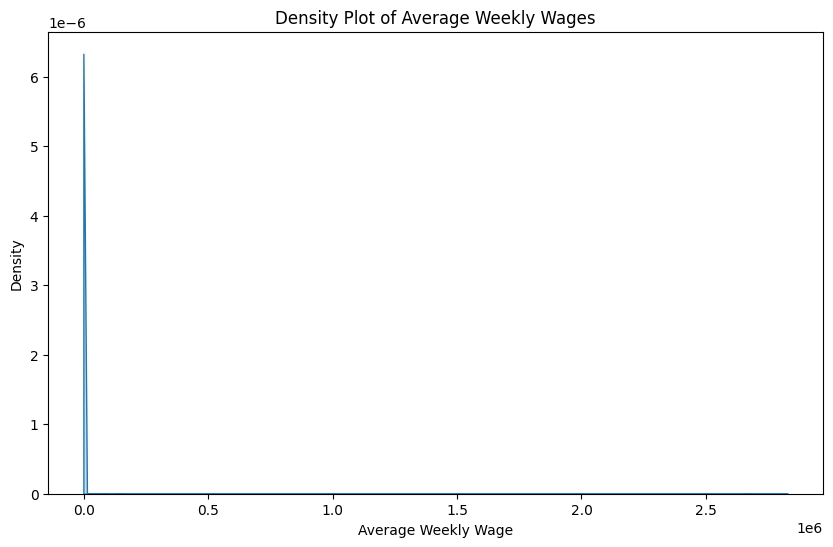

In [27]:
# Create a density plot of 'Average Weekly Wage'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Average Weekly Wage'].dropna(), shade=True)
plt.title('Density Plot of Average Weekly Wages')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Density')
plt.show()

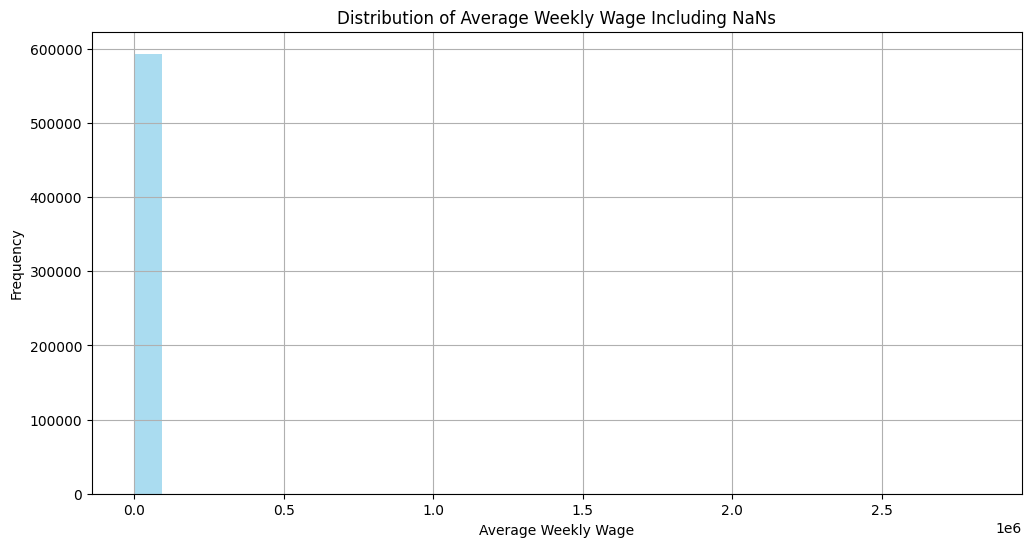

In [67]:
import matplotlib.pyplot as plt

# Fill NaN values with a specific placeholder, e.g., -1
df['Average Weekly Wage Filled'] = df['Average Weekly Wage'].fillna(-1)

plt.figure(figsize=(12, 6))
plt.hist(df['Average Weekly Wage Filled'], bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Average Weekly Wage Including NaNs')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [115]:
df['Average Weekly Wage'].value_counts(dropna=False)

Average Weekly Wage
0.00       335450
NaN         48096
250.00       3193
600.00       2319
1765.00      1294
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120025, dtype: int64

In [118]:
# Calculate value counts including NaN
value_counts = df['Average Weekly Wage'].value_counts(dropna=False)

# Total number of entries
total_entries = df['Average Weekly Wage'].size

# Calculate the percentage of 0.0 values
percent_zero = (value_counts.get(0.0, 0) / total_entries) * 100

# Calculate the percentage of NaN values using np.isnan and sum
percent_nan = (df['Average Weekly Wage'].isna().sum() / total_entries) * 100

# Calculate the percentage of all other values
percent_others = 100 - (percent_zero + percent_nan)

# Print the results
print('Average Weekly Wage Percentages:')
print(f"0.0 values: {percent_zero:.2f}%")
print(f"NaN values: {percent_nan:.2f}%")
print(f"All other values: {percent_others:.2f}%")

Average Weekly Wage Percentages:
0.0 values: 56.52%
NaN values: 8.10%
All other values: 35.37%


In [22]:
(df['Birth Year']==0.0).value_counts()

Birth Year
False    568390
True      25081
Name: count, dtype: int64

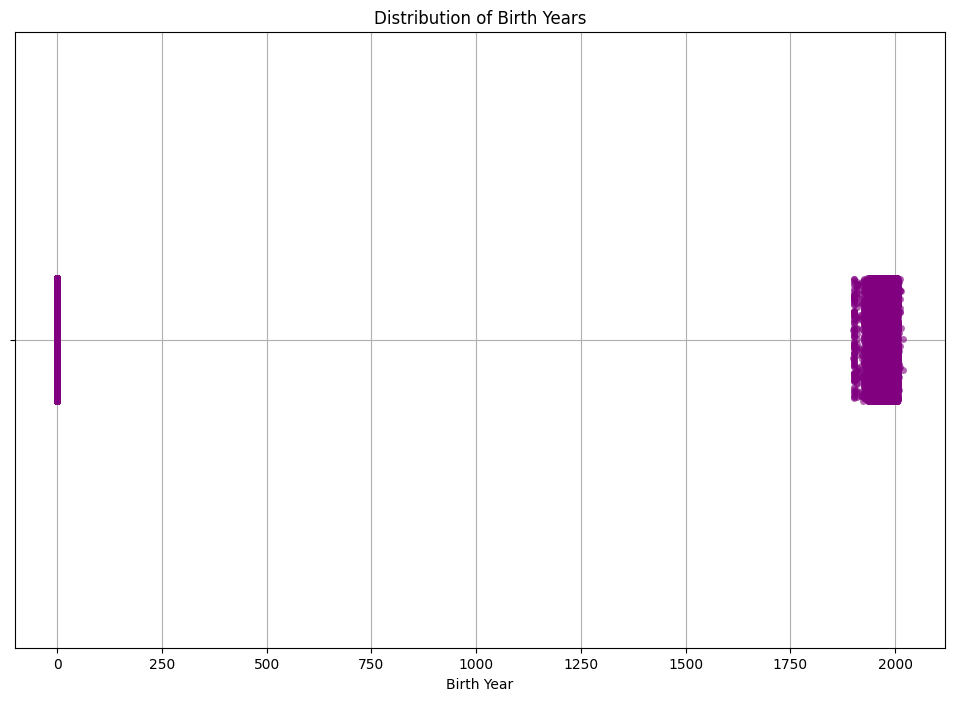

In [18]:
plt.figure(figsize=(12, 8))
sns.stripplot(x=df['Birth Year'], jitter=0.1, size=5, color='purple', alpha=0.6)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.grid(True)
plt.show()

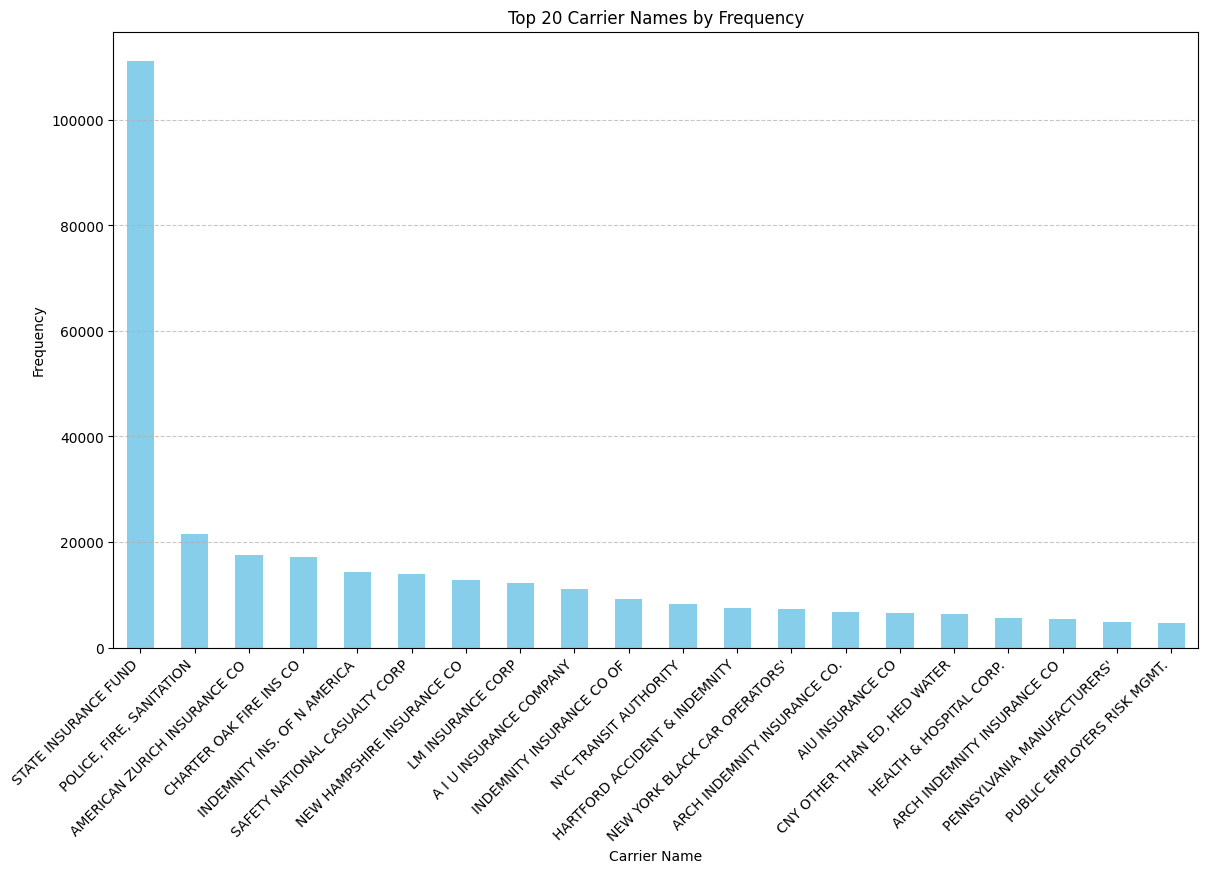

In [23]:
carrier_counts = df['Carrier Name'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Top 20 Carrier Names by Frequency')
plt.xlabel('Carrier Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

In [26]:
(df['Carrier Name'] == 'STATE INSURANCE FUND').value_counts(normalize=True) * 100

Carrier Name
False    81.27221
True     18.72779
Name: proportion, dtype: float64

In [27]:
(df['Carrier Name']).value_counts()

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64

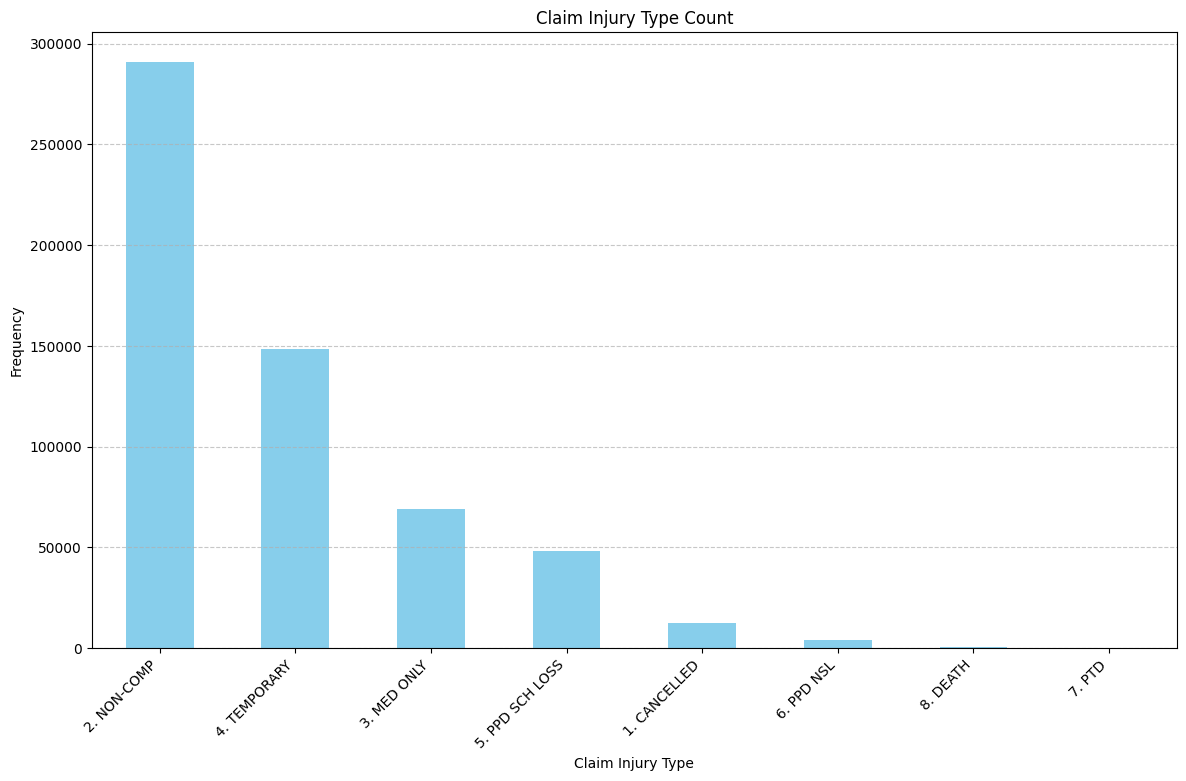

In [30]:
carrier_counts = df['Claim Injury Type'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Claim Injury Type Count')
plt.xlabel('Claim Injury Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

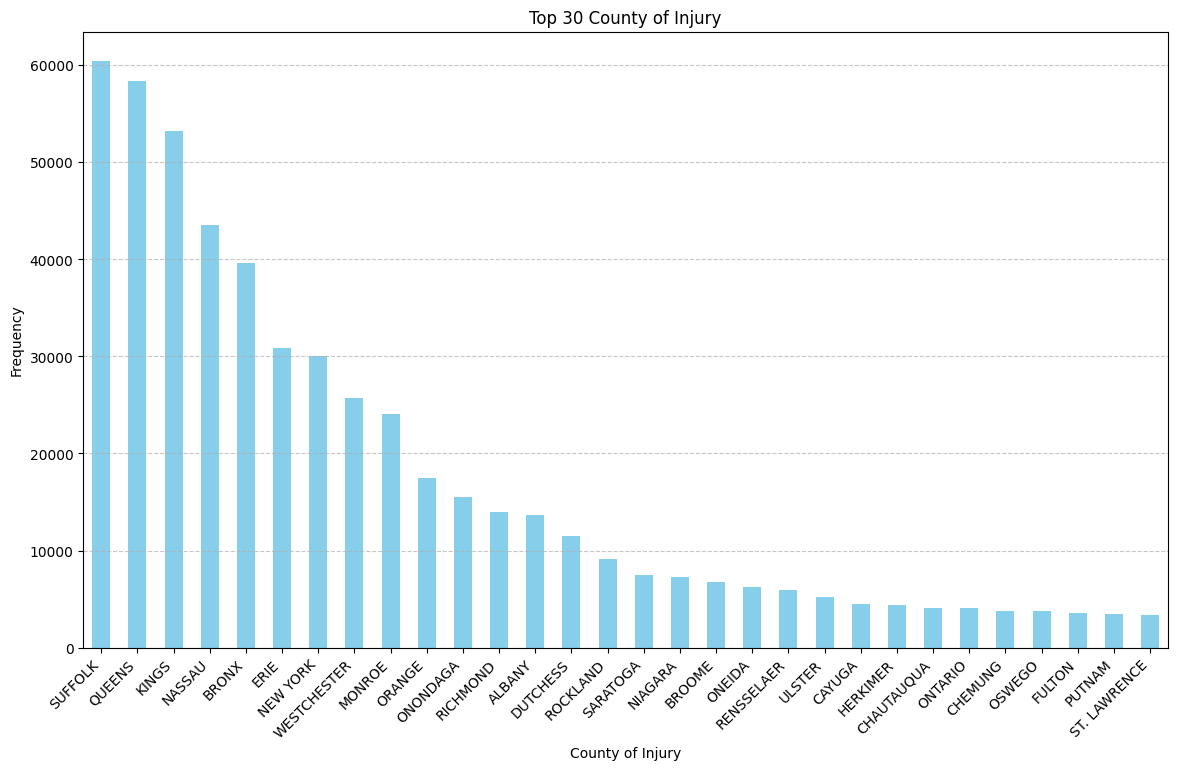

In [89]:
carrier_counts = df['County of Injury'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(30).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Top 30 County of Injury')
plt.xlabel('County of Injury')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

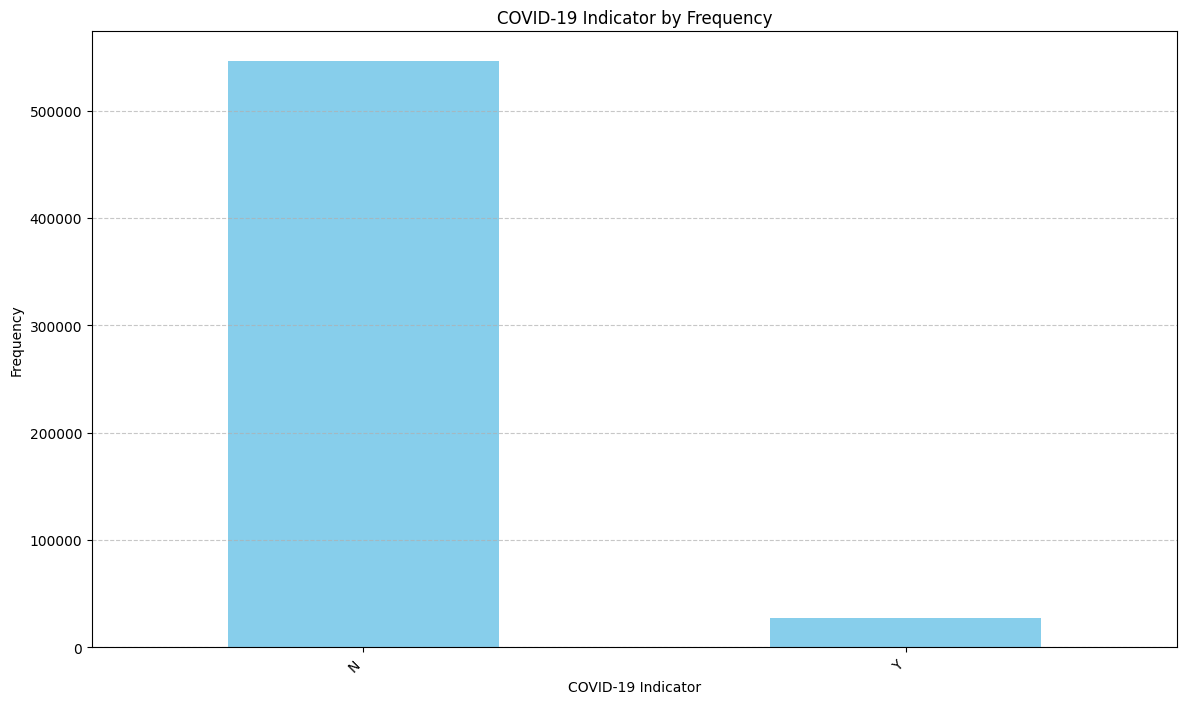

In [37]:
carrier_counts = df['COVID-19 Indicator'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('COVID-19 Indicator by Frequency')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

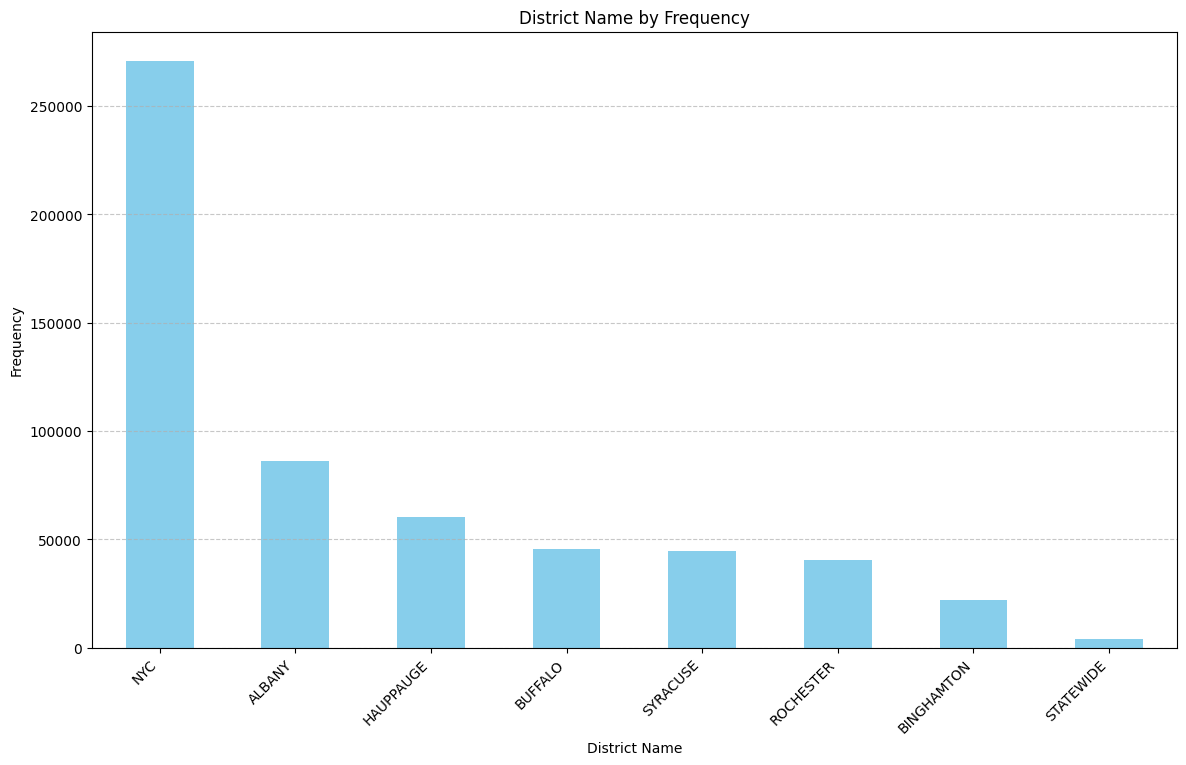

In [38]:
carrier_counts = df['District Name'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('District Name by Frequency')
plt.xlabel('District Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

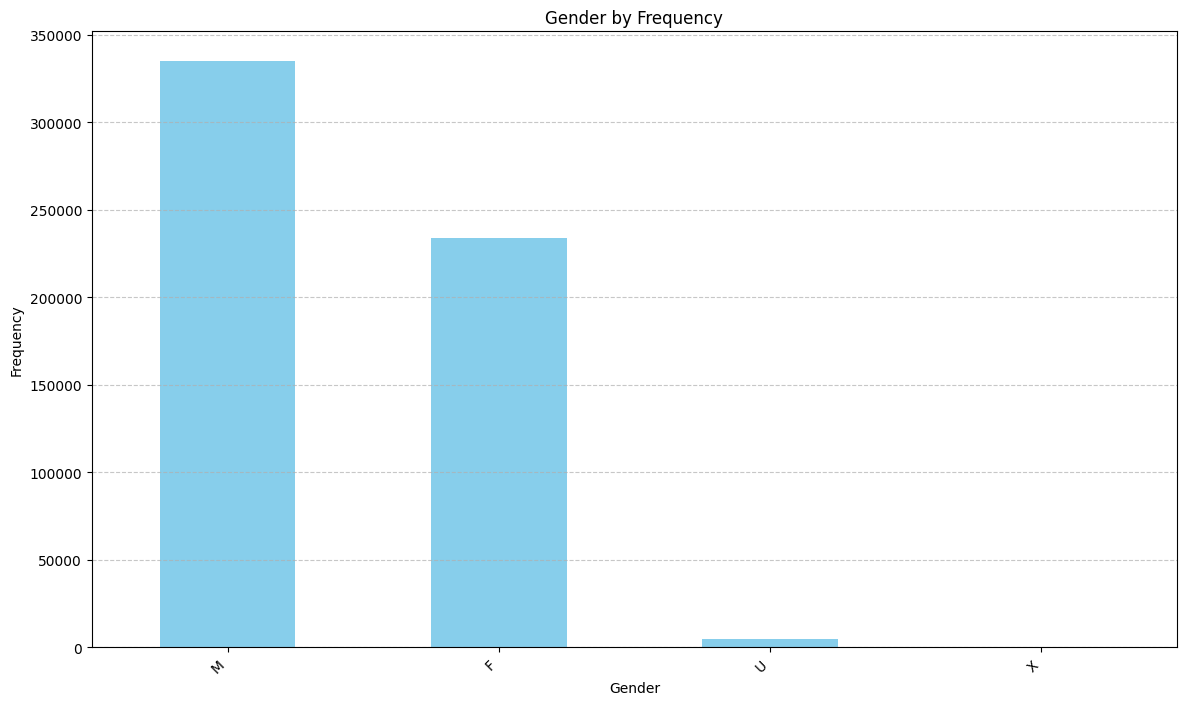

In [39]:
carrier_counts = df['Gender'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Gender by Frequency')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

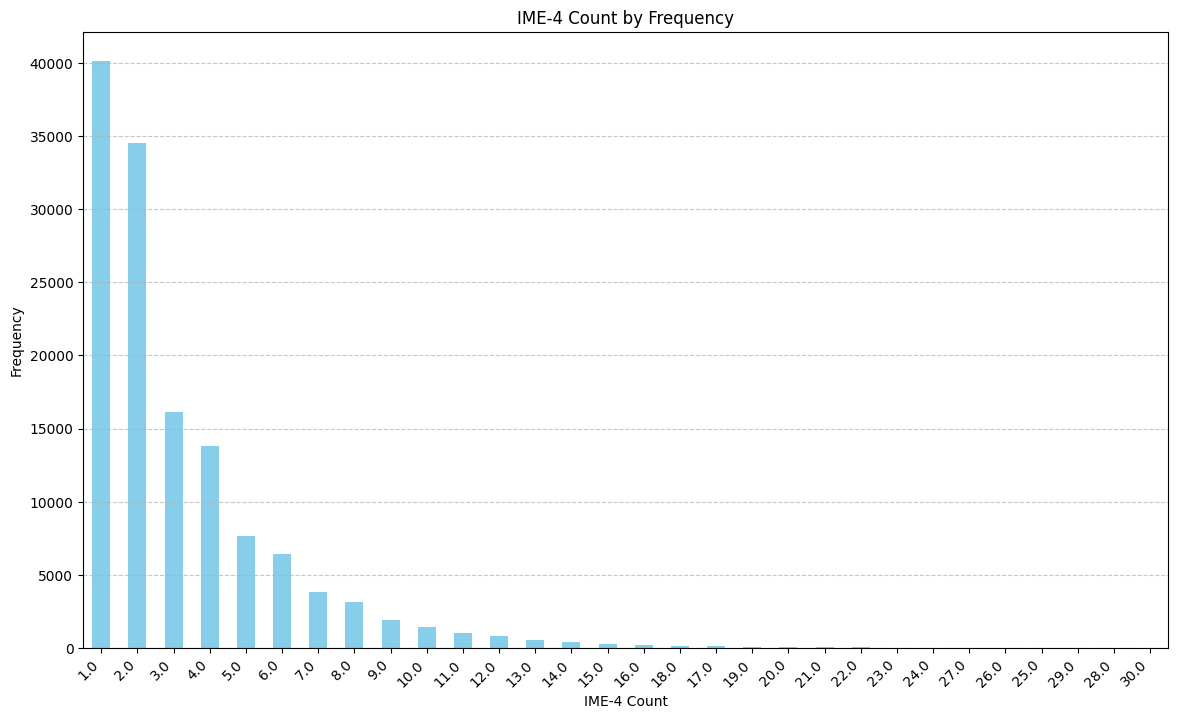

In [41]:
carrier_counts = df['IME-4 Count'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(30).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('IME-4 Count by Frequency')
plt.xlabel('IME-4 Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

In [44]:
(df['IME-4 Count']).value_counts()

IME-4 Count
1.0     40112
2.0     34504
3.0     16136
4.0     13781
5.0      7680
6.0      6427
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
18.0      140
17.0      125
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

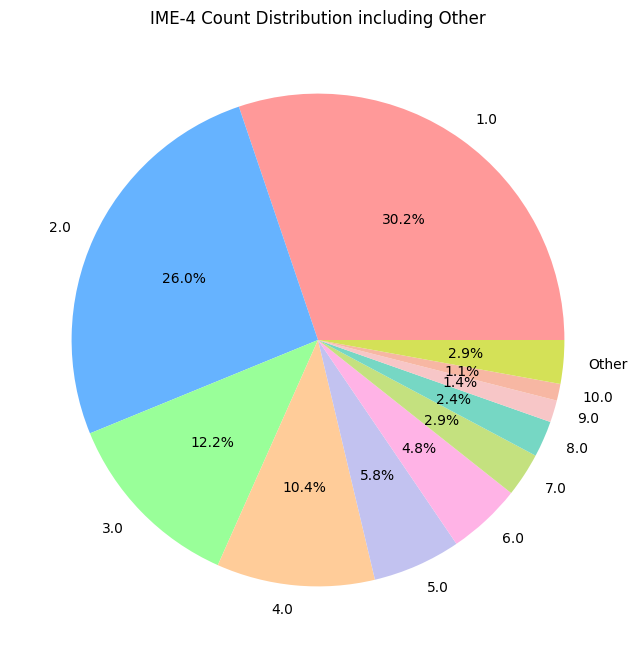

In [48]:

# Assuming 'carrier_counts' contains the value counts of the 'IME-4 Count' column
top_10 = carrier_counts.head(10)
other = carrier_counts.iloc[10:].sum()  # Sum the counts beyond the top 10

# Create a new series that includes 'Other' using pd.concat
pie_data = pd.concat([top_10, pd.Series([other], index=['Other'])])

# Create a pie chart
plt.figure(figsize=(10, 8))
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f', '#76d7c4', '#f7c6c7', '#f7b7a3', '#d4e157'])
plt.title('IME-4 Count Distribution including Other')
plt.ylabel('')  # Pie chart does not require a y-label
plt.show()

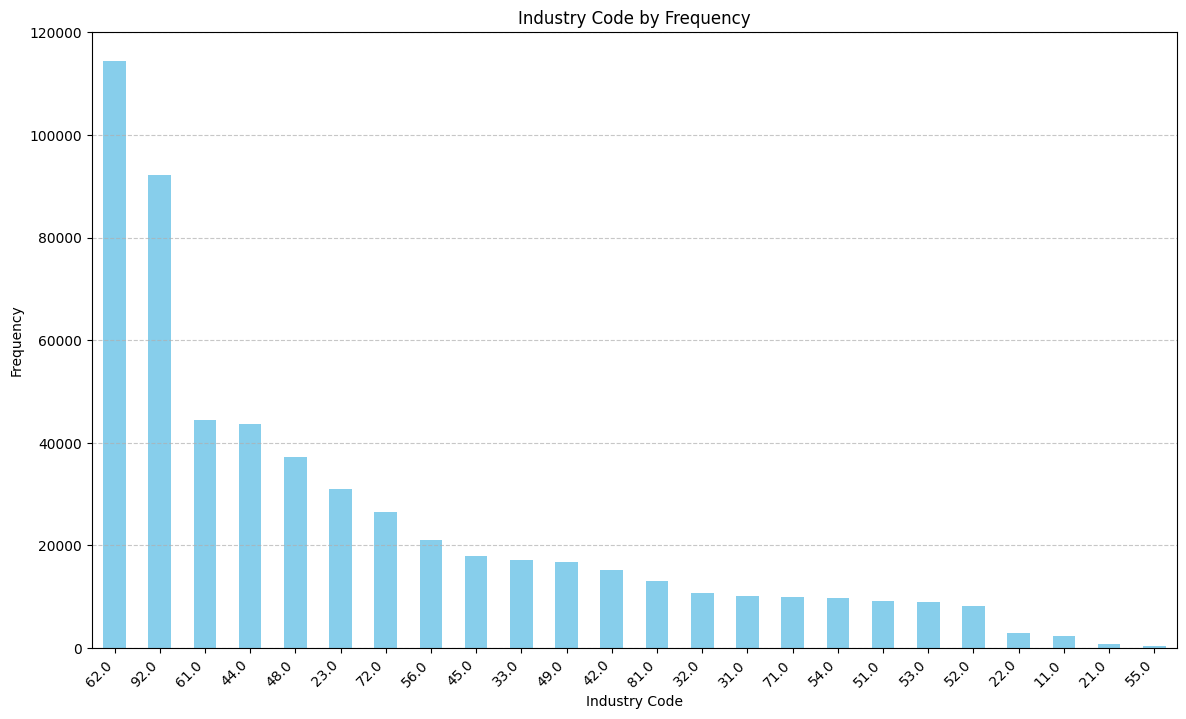

In [52]:
carrier_counts = df['Industry Code'].value_counts()

plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary
carrier_counts.head(24).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Industry Code by Frequency')
plt.xlabel('Industry Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

In [51]:
df['Industry Code'].value_counts()

Industry Code
62.0    114339
92.0     92240
61.0     44393
44.0     43685
48.0     37319
23.0     30903
72.0     26456
56.0     21027
45.0     17953
33.0     17232
49.0     16704
42.0     15236
81.0     13149
32.0     10804
31.0     10114
71.0      9967
54.0      9770
51.0      9166
53.0      8948
52.0      8214
22.0      2980
11.0      2404
21.0       695
55.0       370
Name: count, dtype: int64

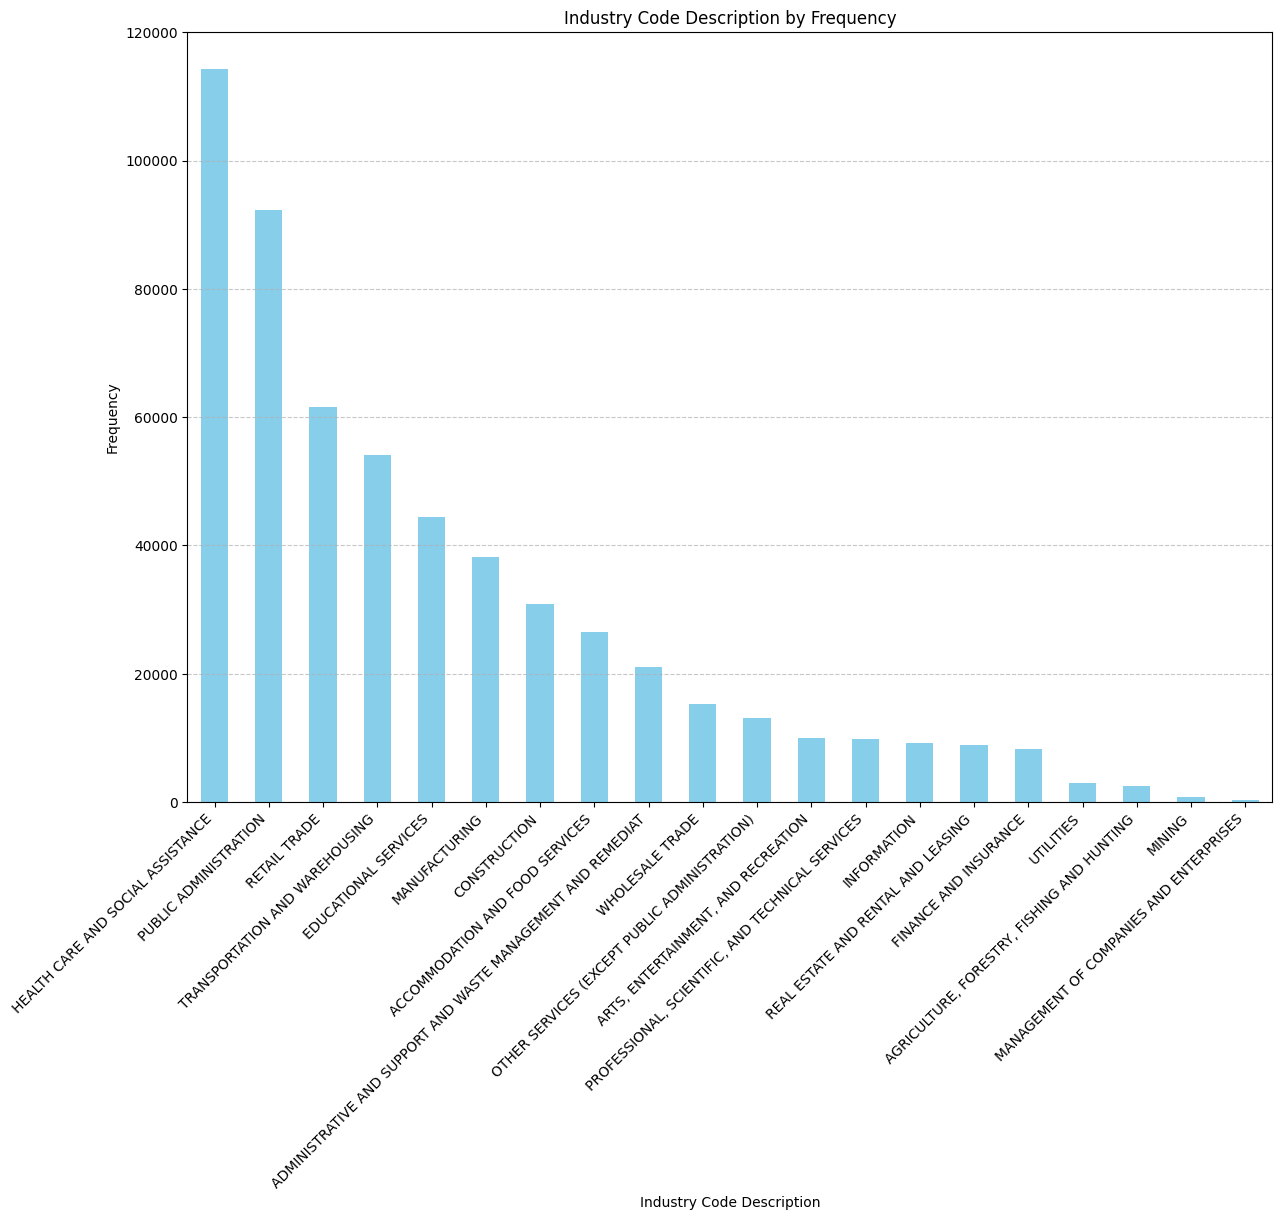

In [56]:
carrier_counts = df['Industry Code Description'].value_counts()

plt.figure(figsize=(14, 10))  # Adjust the figure size as necessary
carrier_counts.head(24).plot(kind='bar', color='skyblue')  # Show top 20 carriers for readability
plt.title('Industry Code Description by Frequency')
plt.xlabel('Industry Code Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better visual comparison
plt.show()

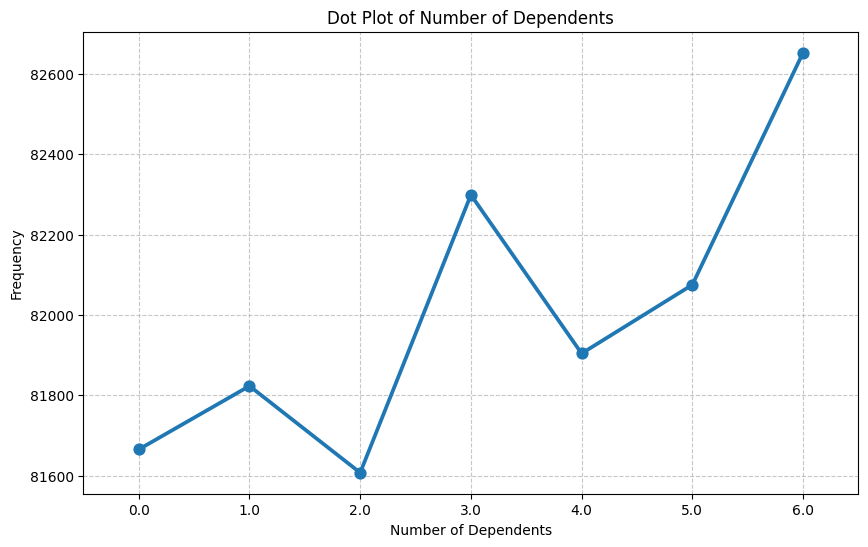

In [84]:
# Count the occurrences of each number of dependents
dependent_counts = df['Number of Dependents'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.pointplot(x=dependent_counts.index, y=dependent_counts.values)
plt.title('Dot Plot of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

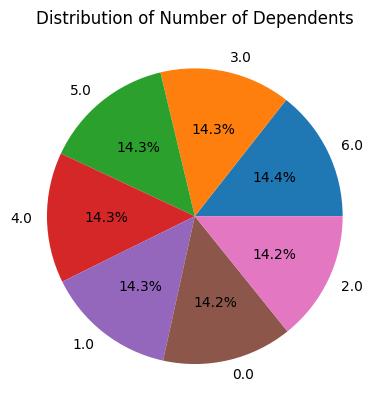

In [23]:
# Drop NA values and count occurrences of each number of dependents
value_counts = df['Number of Dependents'].dropna().value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index.astype(str), autopct='%1.1f%%')
plt.title('Distribution of Number of Dependents')
plt.show()

array([[<Axes: title={'center': 'Age at Injury'}>,
        <Axes: title={'center': 'Average Weekly Wage'}>,
        <Axes: title={'center': 'Birth Year'}>],
       [<Axes: title={'center': 'IME-4 Count'}>,
        <Axes: title={'center': 'Industry Code'}>,
        <Axes: title={'center': 'OIICS Nature of Injury Description'}>],
       [<Axes: title={'center': 'WCIO Cause of Injury Code'}>,
        <Axes: title={'center': 'WCIO Nature of Injury Code'}>,
        <Axes: title={'center': 'WCIO Part Of Body Code'}>],
       [<Axes: title={'center': 'Agreement Reached'}>,
        <Axes: title={'center': 'Number of Dependents'}>, <Axes: >]],
      dtype=object)

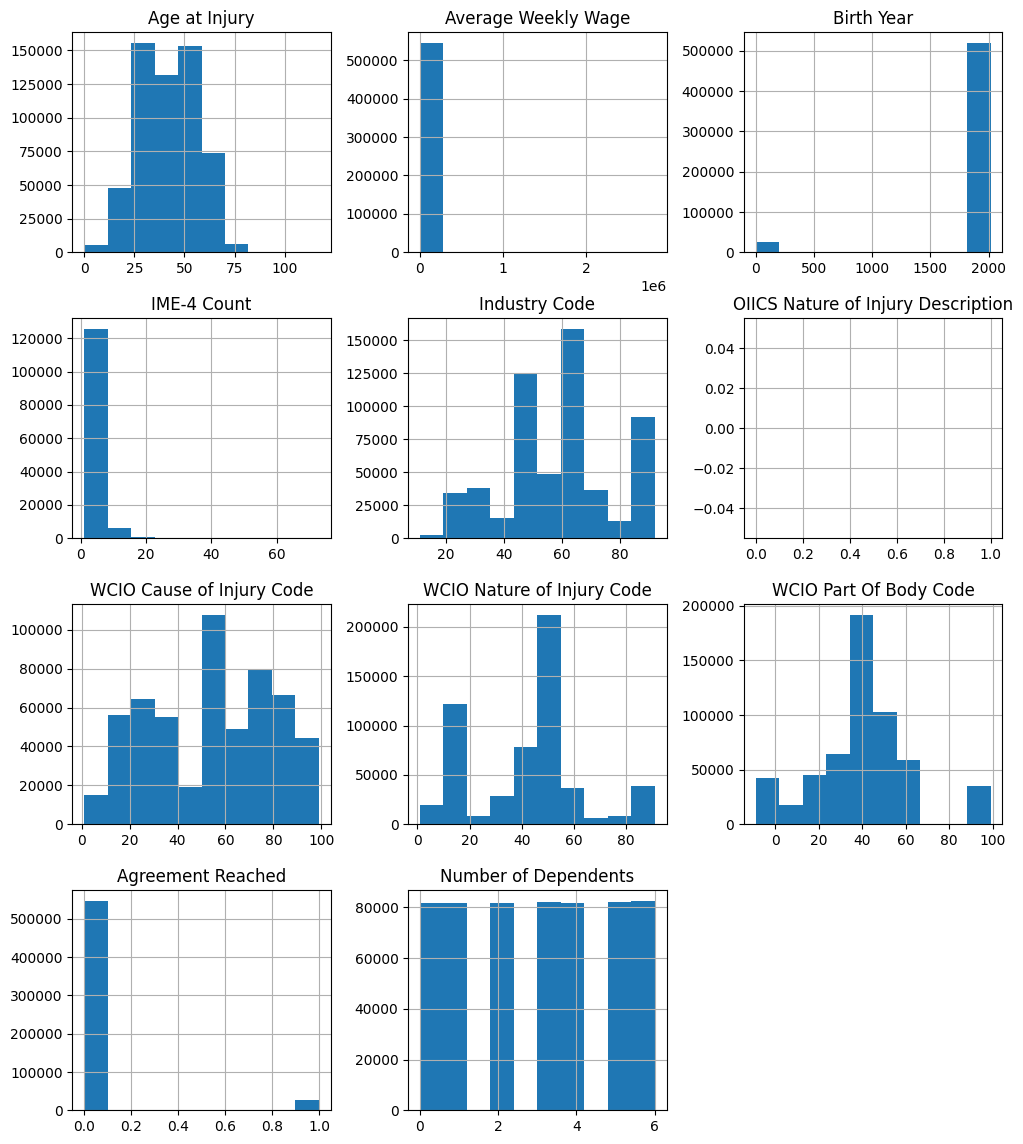

In [12]:
df.hist(figsize=(12, 14))


# Relations Between Variables

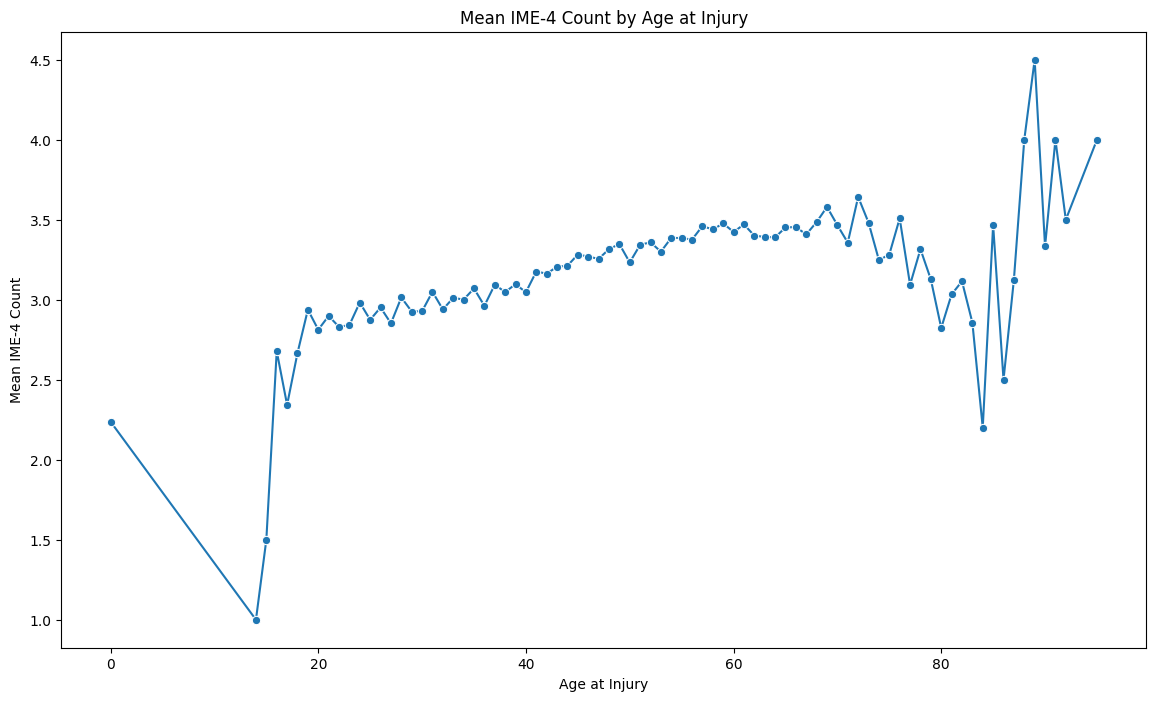

In [101]:
# Create a line plot
mean_ime_by_age = df.groupby('Age at Injury')['IME-4 Count'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Age at Injury', y='IME-4 Count', data=mean_ime_by_age, marker='o')

# Add title and labels
plt.title('Mean IME-4 Count by Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Mean IME-4 Count')

# Show the plot
plt.show()

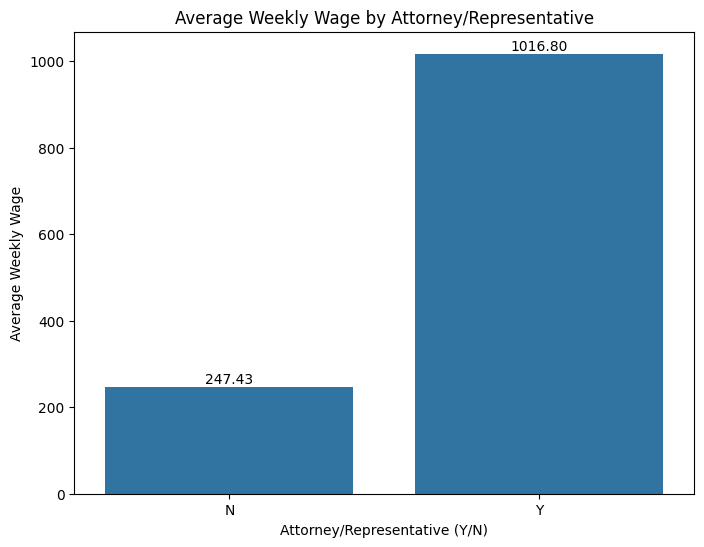

In [111]:
# Assuming df is your DataFrame
# Calculate the mean 'Average Weekly Wage' for each 'Attorney/Representative' category
mean_wage_by_lawyer = df.groupby('Attorney/Representative')['Average Weekly Wage'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=mean_wage_by_lawyer)

# Add title and labels
plt.title('Average Weekly Wage by Attorney/Representative')
plt.xlabel('Attorney/Representative (Y/N)')
plt.ylabel('Average Weekly Wage')

# Annotate the bar plot with the actual mean values
for index, row in mean_wage_by_lawyer.iterrows():
    bar_plot.text(index, row['Average Weekly Wage'], f"{row['Average Weekly Wage']:.2f}", 
                  color='black', ha="center", va="bottom")

# Show the plot
plt.show()

  Attorney/Representative  Average Weekly Wage
0                       N          1197.049809
1                       Y          1321.481600


C:\Users\joaom\AppData\Local\Temp\ipykernel_22764\1921856622.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=mean_wage_by_lawyer, palette='viridis')


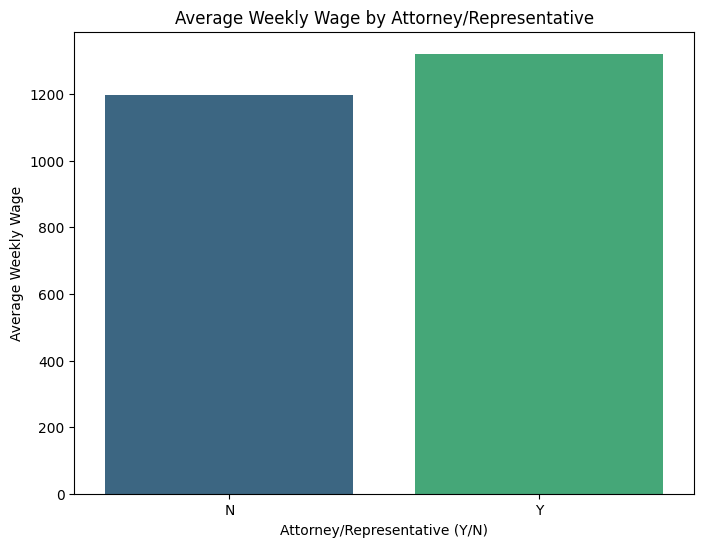

In [109]:
# Remove rows where 'Average Weekly Wage' is 0.0 or NaN
filtered_df = df[df['Average Weekly Wage'] > 0]

# Ensure that the column names match exactly the ones in your dataset.
# Group by 'Attorney/Representative' and calculate the mean 'Average Weekly Wage'
mean_wage_by_lawyer = filtered_df.groupby('Attorney/Representative')['Average Weekly Wage'].mean().reset_index()

print(mean_wage_by_lawyer)

plt.figure(figsize=(8, 6))
sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=mean_wage_by_lawyer, palette='viridis')

# Add title and labels
plt.title('Average Weekly Wage by Attorney/Representative')
plt.xlabel('Attorney/Representative (Y/N)')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.show()

In [107]:
df['Average Weekly Wage'].value_counts(dropna=False)


Average Weekly Wage
0.00       335450
NaN         48096
250.00       3193
600.00       2319
1765.00      1294
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120025, dtype: int64

<Axes: >

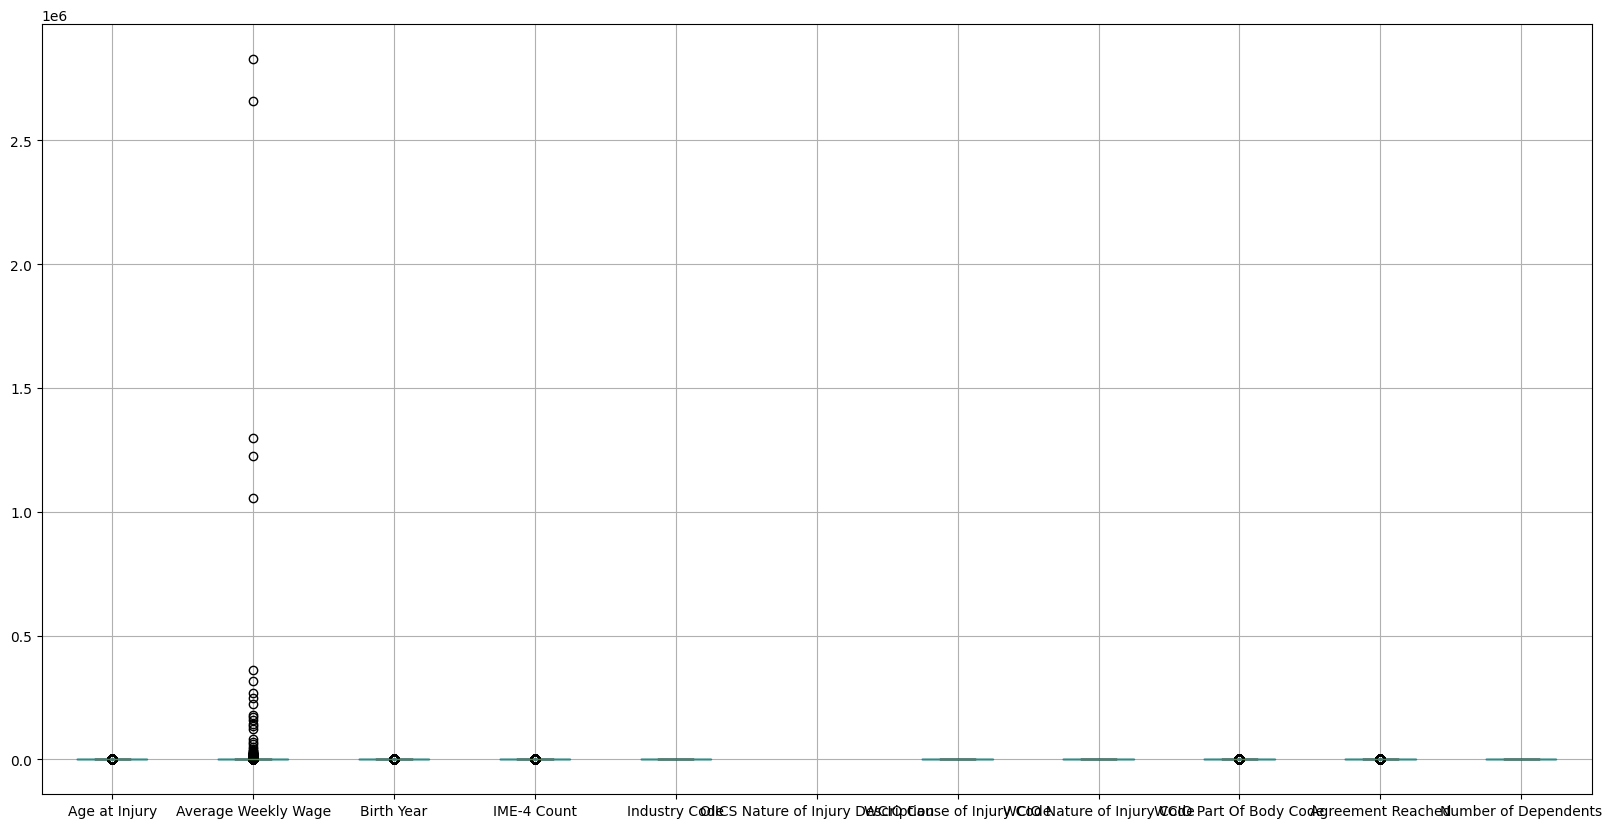

In [13]:
df.boxplot(figsize=(20, 10))

In [102]:
# Select all numeric columns
df_numeric = df.select_dtypes(include=['number'])

# If 'OIICS Nature of Injury Description' exists in the DataFrame and is a non-numeric column, you can drop it first.
df_numeric = df_numeric.drop(columns=['OIICS Nature of Injury Description'], errors='ignore')

df_numeric = df_numeric.dropna()


df_nonnumeric = df.drop(df_numeric.columns, axis=1)

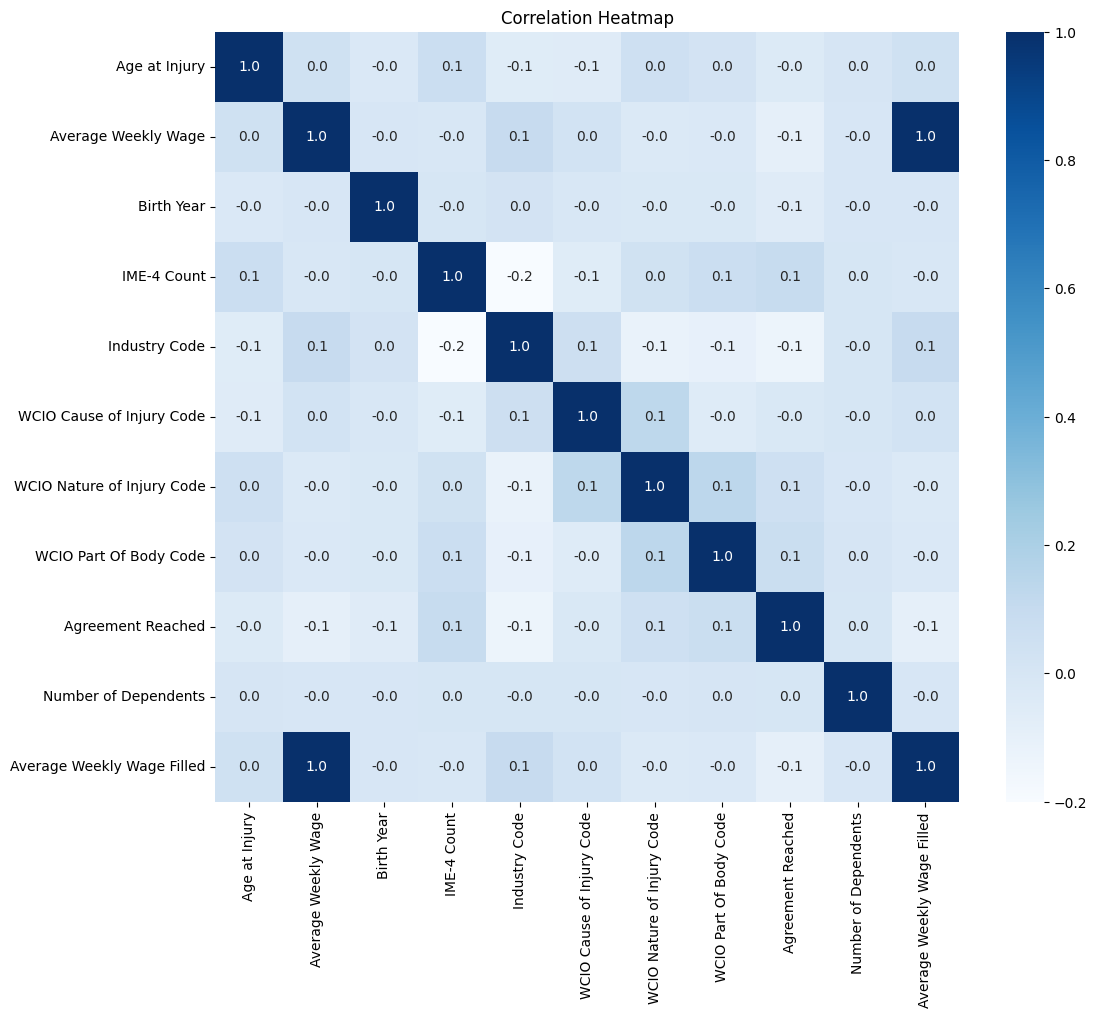

In [103]:
# Compute the correlation matrix for the numeric columns
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, annot=True, cmap=plt.cm.Blues, fmt='.1f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# For Claim Injury Type
print(df['Claim Injury Type'].value_counts())

# For WCB Decision
print(df['WCB Decision'].value_counts())

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64
WCB Decision
Not Work Related    574026
Name: count, dtype: int64


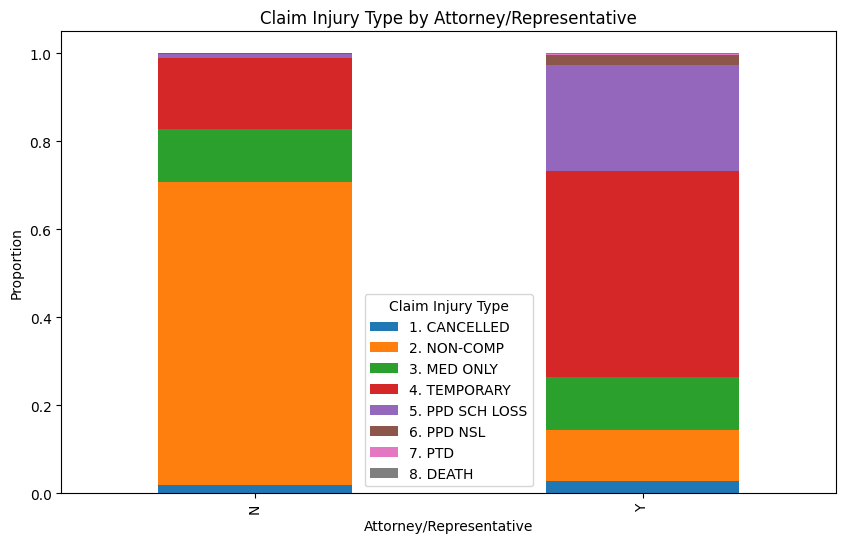

In [18]:
df.groupby('Attorney/Representative')['Claim Injury Type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Claim Injury Type by Attorney/Representative')
plt.ylabel('Proportion')
plt.show()

Claim Injury Type        1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Attorney/Representative                                                         
N                                7426       269969        47207         63268   
Y                                5051        21109        21699         85239   

Claim Injury Type        5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
Attorney/Representative                                                 
N                                   4279          89       1        52  
Y                                  44001        4122      96       418  


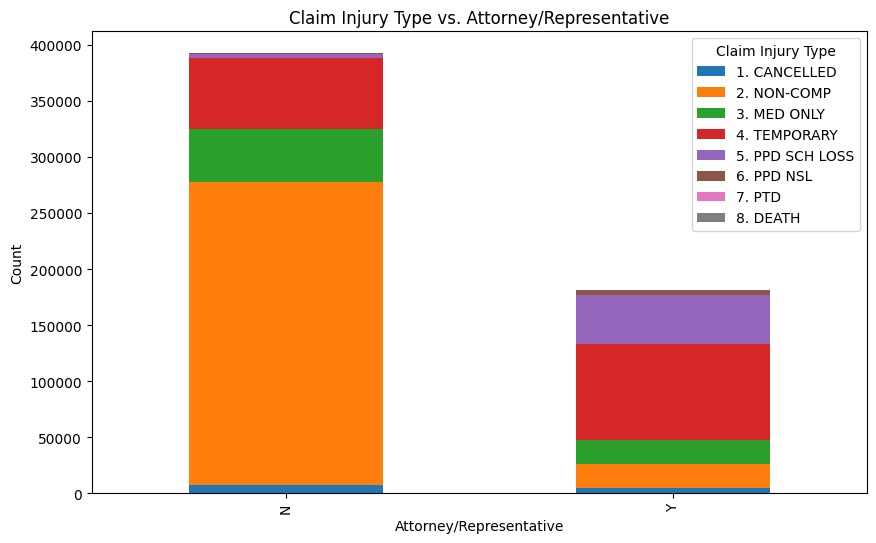

In [19]:
crosstab = pd.crosstab(df['Attorney/Representative'], df['Claim Injury Type'])
print(crosstab)

# Visualize with a bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Claim Injury Type vs. Attorney/Representative')
plt.ylabel('Count')
plt.show()


In [20]:
print(df['Attorney/Representative'].value_counts())

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64


In [21]:
print(df['Gender'].value_counts())

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64


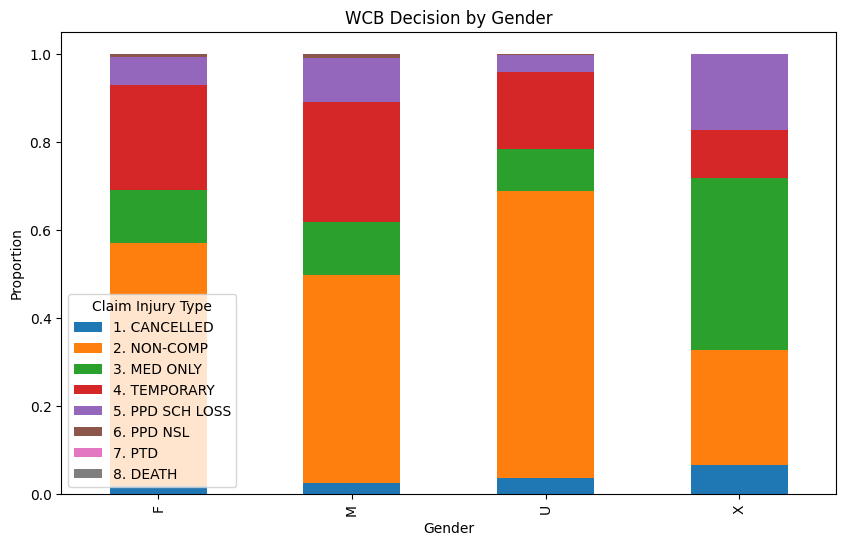

In [22]:
df.groupby('Gender')['Claim Injury Type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('WCB Decision by Gender')
plt.ylabel('Proportion')
plt.show()


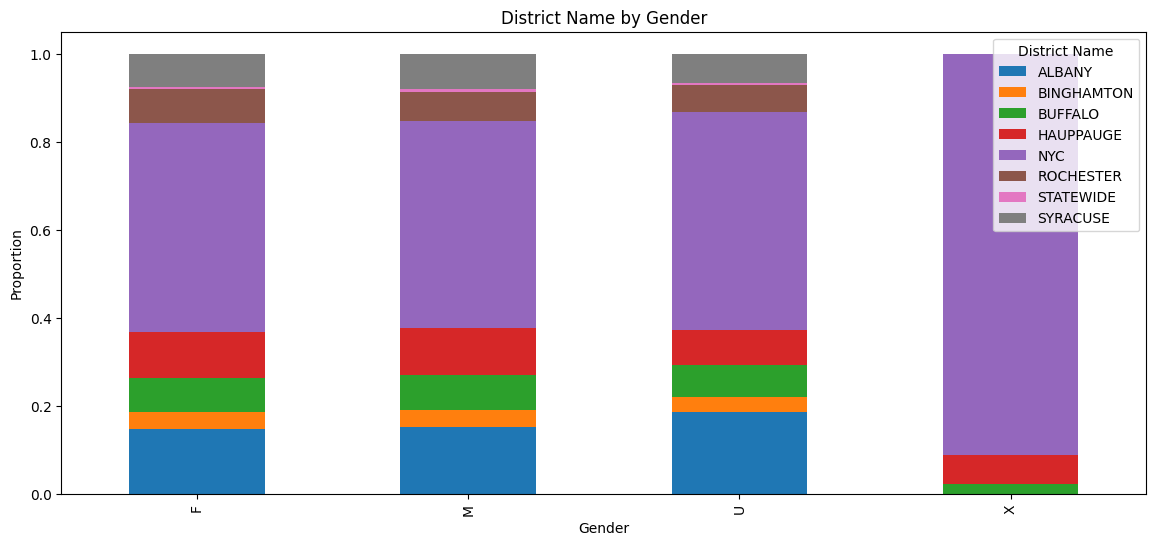

In [26]:
df.groupby('Gender')['District Name'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('District Name by Gender')
plt.ylabel('Proportion')
plt.show()

<Figure size 1000x600 with 0 Axes>

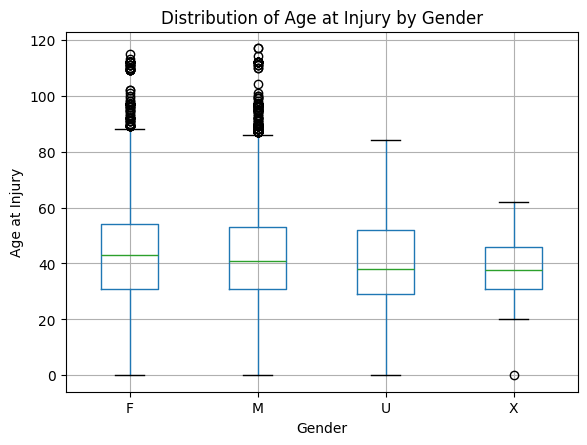

In [30]:
# Creating a box plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
df.boxplot(column='Age at Injury', by='Gender')
plt.title('Distribution of Age at Injury by Gender')
plt.suptitle('')  # Suppress the automatic title to avoid duplication
plt.xlabel('Gender')
plt.ylabel('Age at Injury')
plt.show()

<Figure size 1000x600 with 0 Axes>

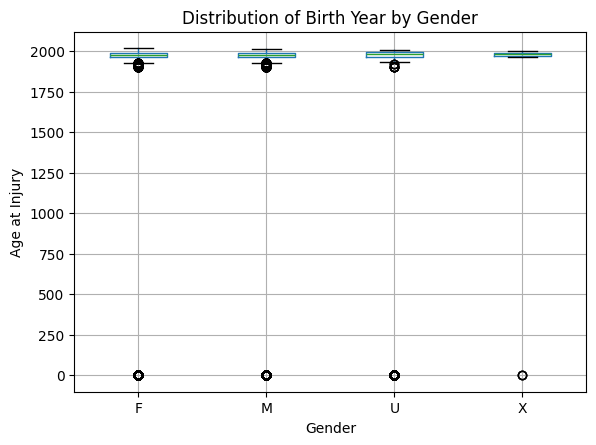

In [45]:
# Creating a box plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
df.boxplot(column='Birth Year', by='Gender')
plt.title('Distribution of Birth Year by Gender')
plt.suptitle('')  # Suppress the automatic title to avoid duplication
plt.xlabel('Gender')
plt.ylabel('Age at Injury')
plt.show()

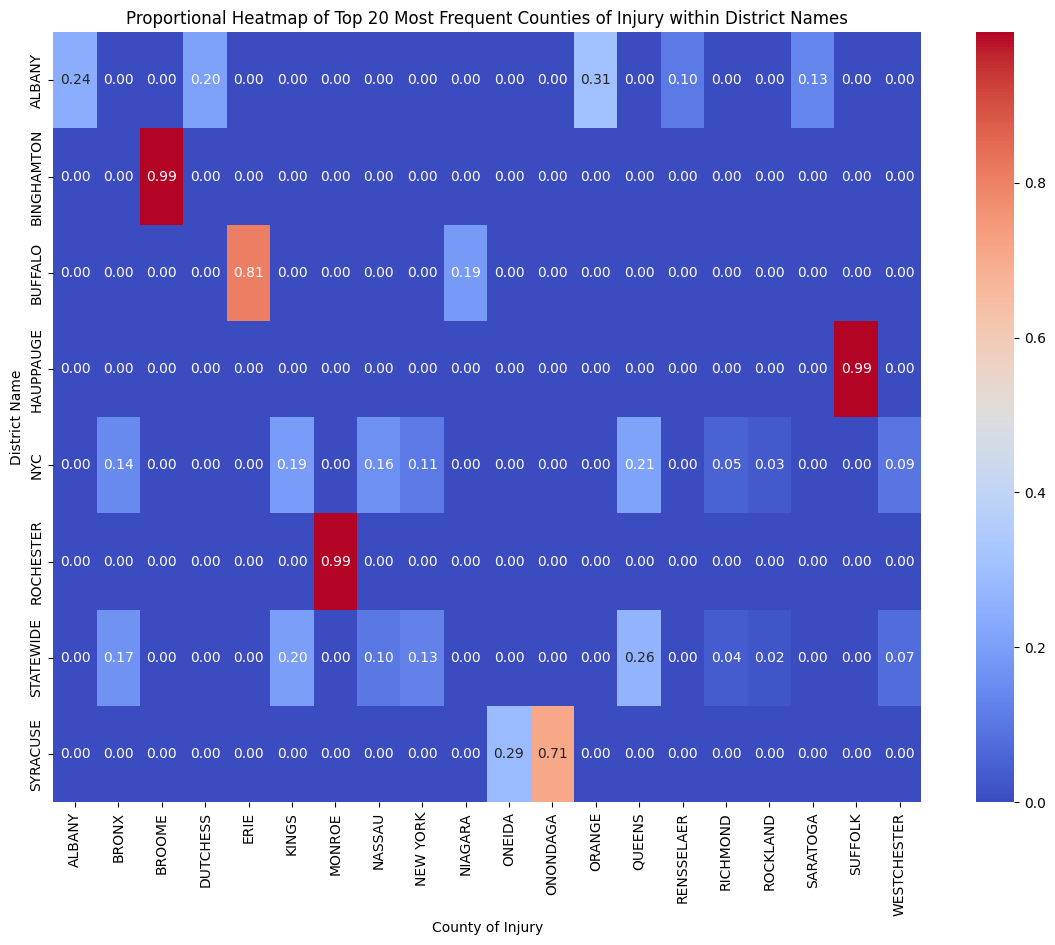

In [94]:
# Calculate the frequency of each county and get the top 20
top_20_counties = df['County of Injury'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows where the county is in the top 20
filtered_df = df[df['County of Injury'].isin(top_20_counties)]

pivot_table = filtered_df.pivot_table(index='District Name', columns='County of Injury', aggfunc='size', fill_value=0)

# Normalize the pivot table by the total cases in each district to get proportions
proportional_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(proportional_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportional Heatmap of Top 20 Most Frequent Counties of Injury within District Names')
plt.xlabel('County of Injury')
plt.ylabel('District Name')
plt.show()
plt.show()

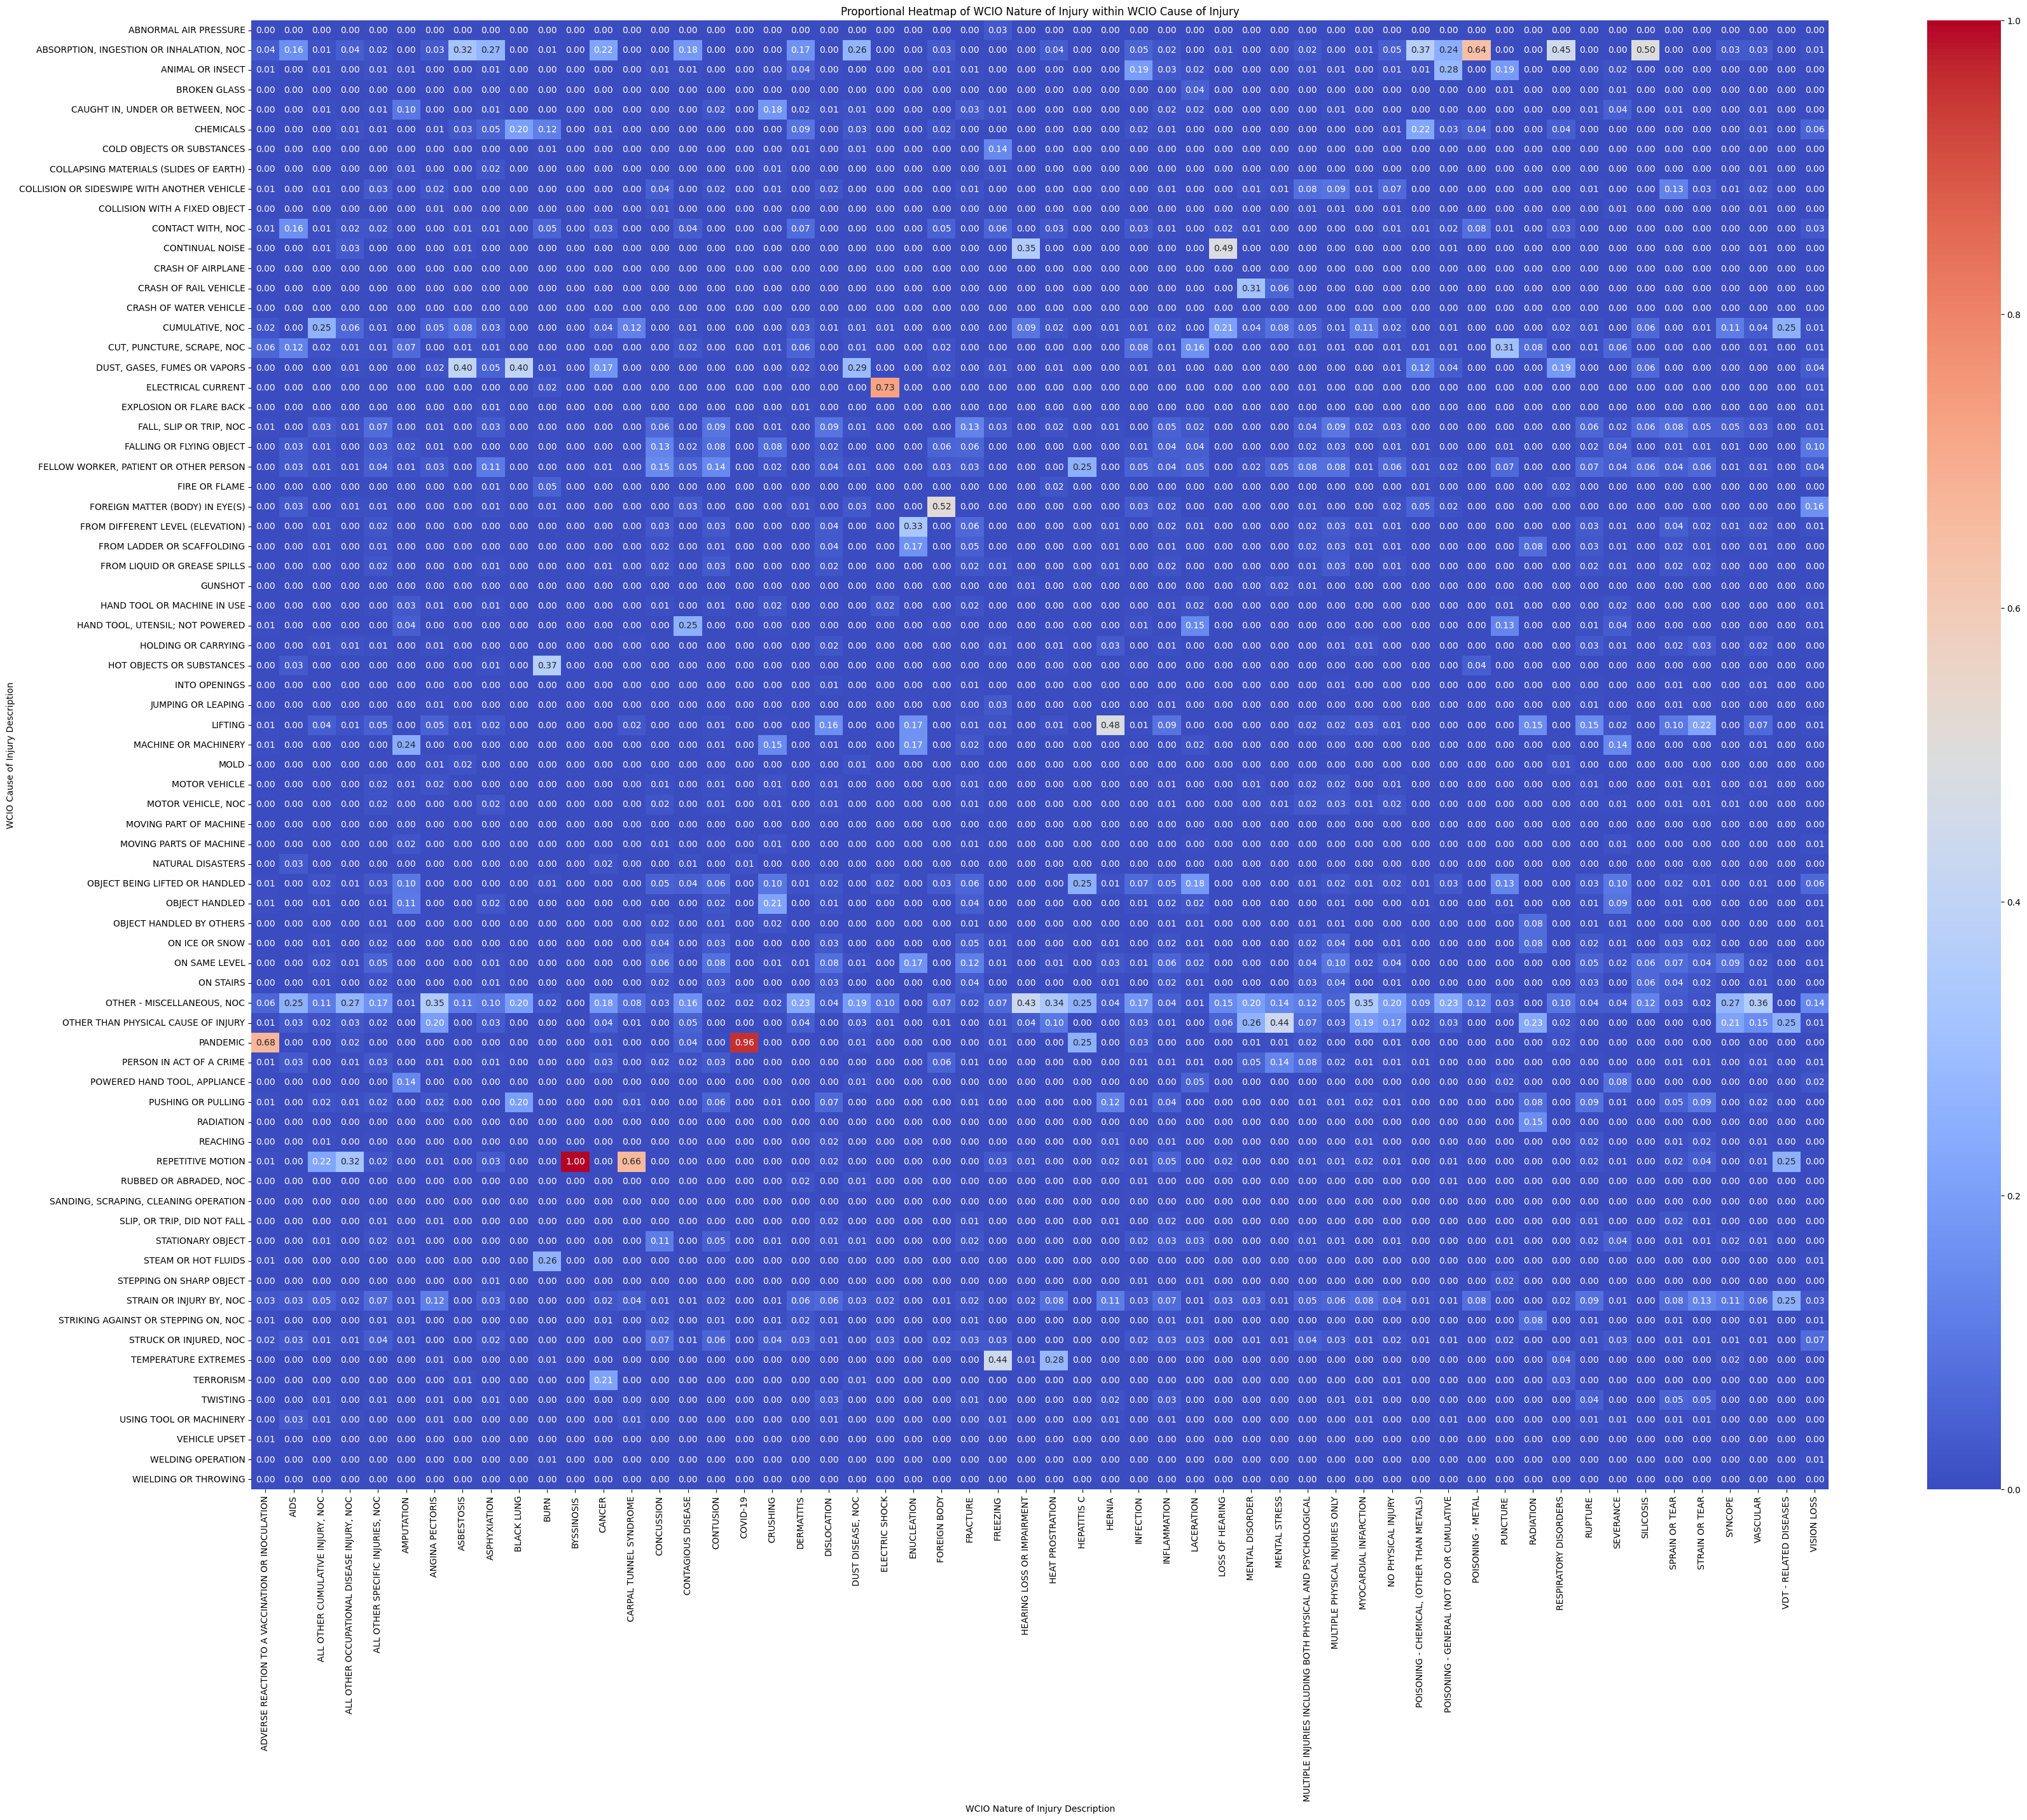

In [125]:
# Create a pivot table
pivot_table = df.pivot_table(index='WCIO Cause of Injury Description', 
                             columns='WCIO Nature of Injury Description', 
                             aggfunc='size', 
                             fill_value=0)

# Normalize the pivot table by column to get proportions
proportional_pivot = pivot_table.div(pivot_table.sum(axis=0), axis=1)

# Plotting the heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(proportional_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportional Heatmap of WCIO Nature of Injury within WCIO Cause of Injury')
plt.xlabel('WCIO Nature of Injury Description')
plt.ylabel('WCIO Cause of Injury Description')
plt.show()

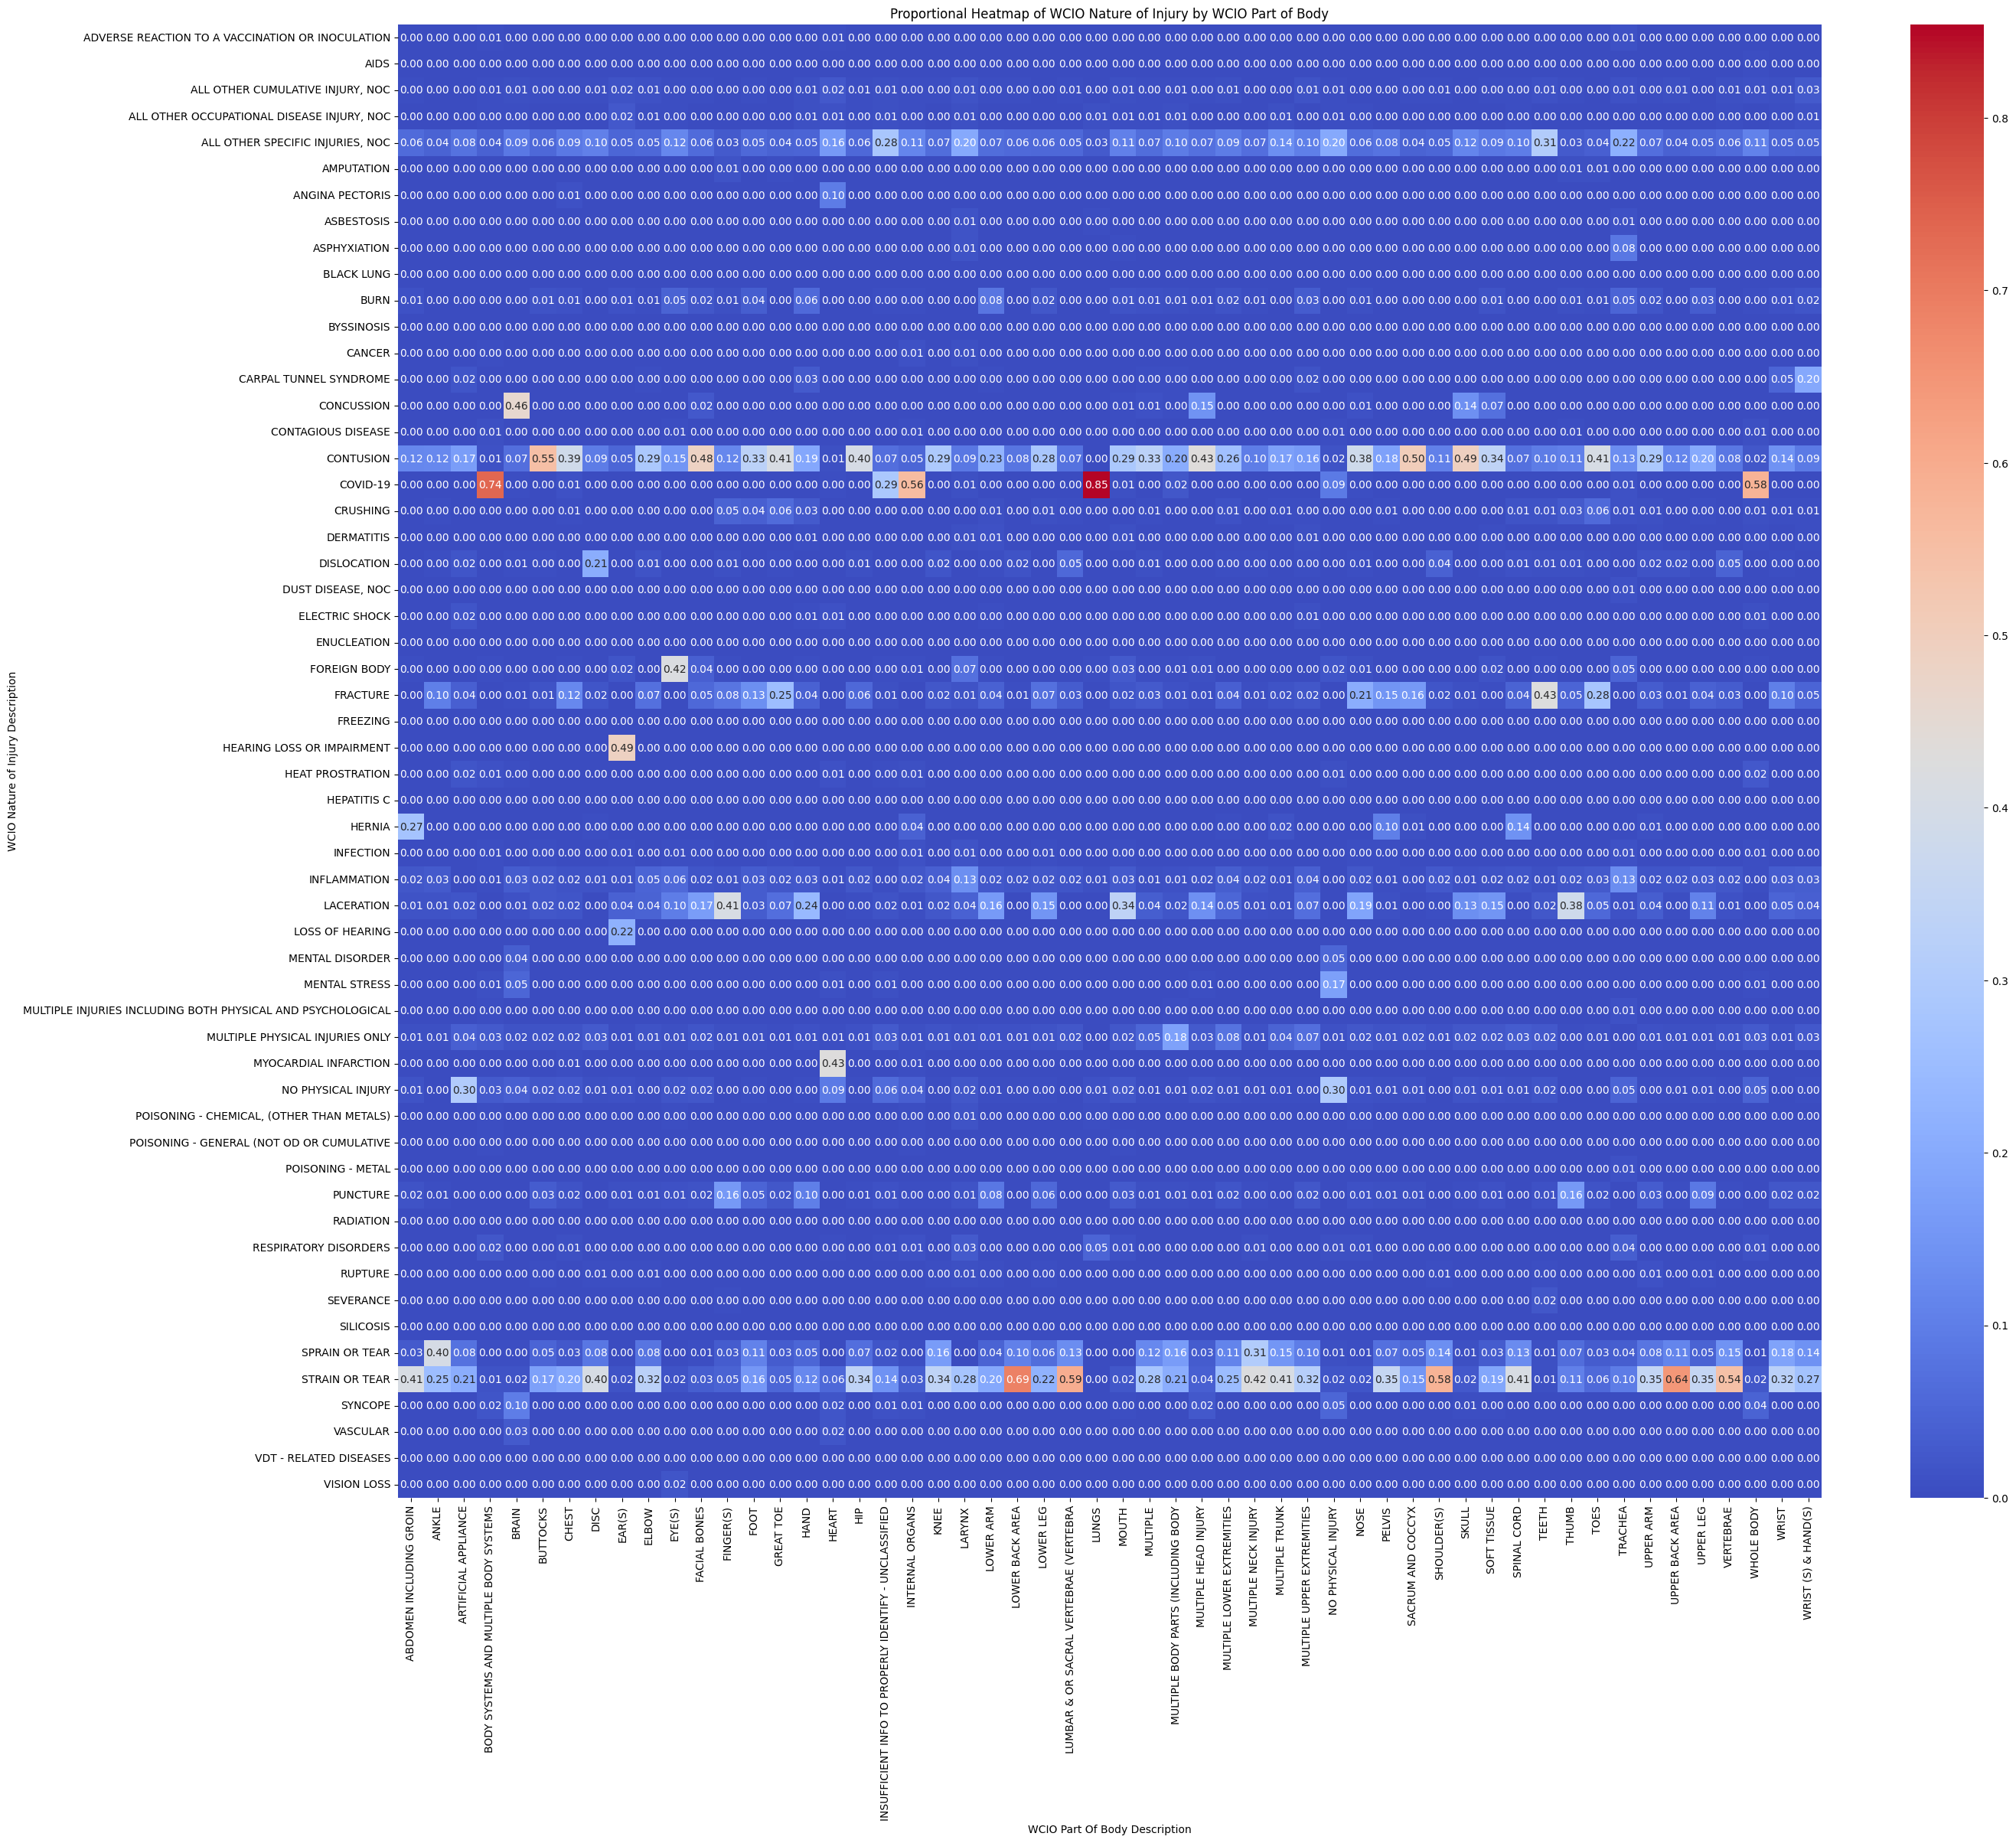

In [138]:
# Create a pivot table
pivot_table = df.pivot_table(index='WCIO Nature of Injury Description', 
                             columns='WCIO Part Of Body Description', 
                             aggfunc='size', 
                             fill_value=0)
# Normalize the pivot table by column to get proportions
proportional_pivot = pivot_table.div(pivot_table.sum(axis=0), axis=1)

# Plotting the heatmap
plt.figure(figsize=(30, 25))  # Adjust size as necessary
sns.heatmap(proportional_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportional Heatmap of WCIO Nature of Injury by WCIO Part of Body')
plt.xlabel('WCIO Part Of Body Description')
plt.ylabel('WCIO Nature of Injury Description')
plt.show()


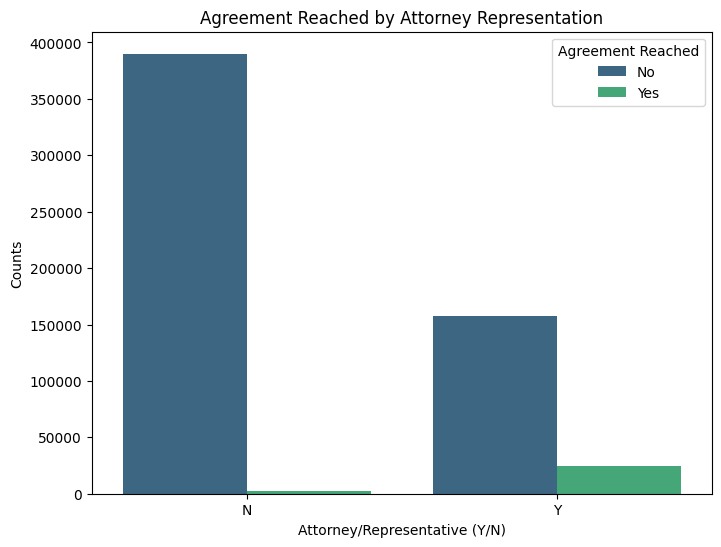

In [141]:
# Convert 'Agreement Reached' to string for better categorical plotting
df['Agreement Reached'] = df['Agreement Reached'].map({0: 'No', 1: 'Yes'})

# Prepare data
agreement_counts = df.groupby(['Attorney/Representative', 'Agreement Reached']).size().reset_index(name='Counts')

# Create a clustered bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Attorney/Representative', y='Counts', hue='Agreement Reached', data=agreement_counts, palette='viridis')
plt.title('Agreement Reached by Attorney Representation')
plt.xlabel('Attorney/Representative (Y/N)')
plt.ylabel('Counts')
plt.show()

# Other

Gender  Age at Injury
M       0                3752
        1                   0
        2                   0
        3                   0
        4                   0
        5                   1
        6                   0
        7                   1
        8                   2
        9                   3
        10                  1
        11                  4
        12                  6
        13                  6
        14                 26
        15                 68
        16                276
        17                626
        18               2106
        19               3473
        20               4346
        21               4822
        22               5363
        23               6058
        24               6165
        25               6726
        26               7126
        27               7349
        28               7757
        29               8194
        30               8537
        31               8603
        32        

In [44]:
df[df['Birth Year']==0]['Gender'].value_counts()

Gender
M    15347
F     9406
U      325
X        3
Name: count, dtype: int64

In [46]:
df[df['Birth Year']==0]['Age at Injury'].value_counts()

Age at Injury
0.0      1926
30.0      605
57.0      572
31.0      563
29.0      563
         ... 
96.0        1
86.0        1
111.0       1
7.0         1
9.0         1
Name: count, Length: 88, dtype: int64

In [13]:
X = df.drop('Claim Injury Type', axis = 1)
y = df['Claim Injury Type']


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

ValueError: Input contains NaN

In [20]:
from sklearn.decomposition import PCA
import numpy as np

# Select only numerical features for PCA
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_df)

# Visualize the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by PCA.

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
for var in df_nonnumeric:
    TestIndependence(df_nonnumeric[var],y_train, var)

In [ ]:
# Create a 8x4 grid of subplots to handle 32 columns
fig, axes = plt.subplots(8, 4, figsize=(15, 30))  # Adjusted grid and figure size

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the numeric columns and create scatter plots
for i, column in enumerate(df_numeric.columns):
    axes[i].scatter(x=df_numeric[column], y=df['Zip Code'].astype(str), edgecolors="white", alpha=0.5)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Region')

# Add some space between the plots
plt.tight_layout(pad=3.0)
plt.show()

KeyboardInterrupt: 

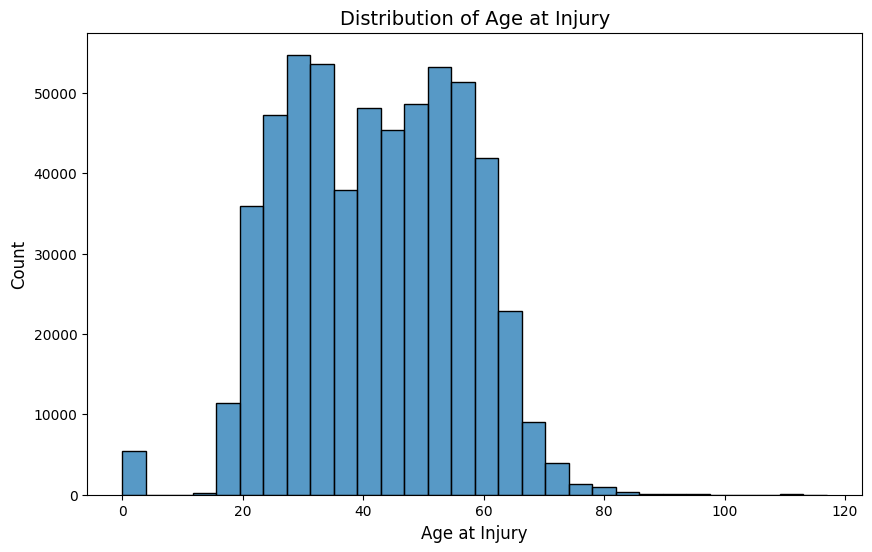

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(df['Age at Injury'], bins=30, kde=False)

# Set plot labels and title
plt.title('Distribution of Age at Injury', fontsize=14)
plt.xlabel('Age at Injury', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


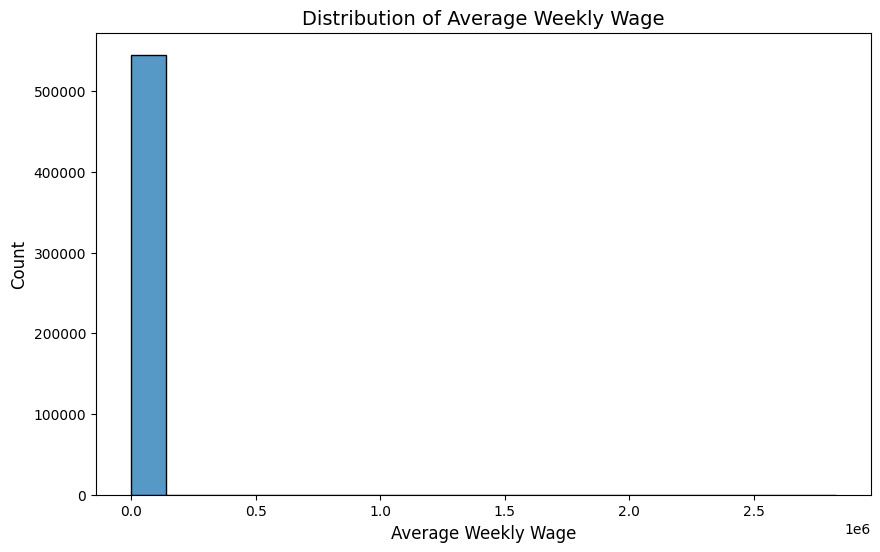

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(df['Average Weekly Wage'], bins=20, kde=False)

# Set plot labels and title
plt.title('Distribution of Average Weekly Wage', fontsize=14)
plt.xlabel('Average Weekly Wage', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()
